# Indian Start-Up Funding Ecosystem

## Business Understanding
Objective: The primary objective is to venture into the Indian start-up ecosystem. This involves understanding the landscape of start-ups in India, their funding patterns, and the key players in the ecosystem (both start-ups and investors).

Problem Definition: The problem can be defined as analyzing the funding received by Indian start-ups from 2018 to 2021. This involves understanding the trends in funding, identifying the sectors or industries that are attracting the most investment, and recognizing the major investors in the ecosystem.

Data Understanding: The data that will be used for this analysis includes details of the start-ups, the funding amounts they received, and information about the investors. This data will be provided separately for each year from 2018 to 2021 via three different sources.

Plan: The preliminary plan would involve cleaning and preprocessing the data, conducting exploratory data analysis to understand trends and patterns, and possibly building predictive models to forecast future trends in the start-up ecosystem.

Success Criteria: The success of this project could be measured by the team’s ability to gain insights that help in making informed decisions about venturing into the Indian start-up ecosystem. This could involve identifying promising sectors, understanding the competitive landscape, and recognizing potential investment opportunities.

## Hypothesis Test
Null Hypothesis (H0): The location of a start-up in India does not affect the amount of funding it receives.
Alternative Hypothesis (H1): The location of a start-up in India does affect the amount of funding it receives.

Null Hypothesis (H0): There is no difference in the amount of funding received by start-ups across different sectors.
Alternative Hypothesis (H1): There is a difference in the amount of funding received by start-ups across different sectors.

Null Hypothesis (H0): The size of a start-up (in terms of employees or customers) does not affect the amount of funding it receives.
Alternative Hypothesis (H1): The size of a start-up (in terms of employees or customers) does affect the amount of funding it receives.

Null Hypothesis (H0): All investors contribute equally to the funding of start-ups.
Alternative Hypothesis (H1): Some investors contribute more to the funding of start-ups than others.

Null Hypothesis (H0): The amount of funding received by Indian start-ups has not changed from 2018 to 2021.
Alternative Hypothesis (H1): The amount of funding received by Indian start-ups has increased or decreased from 2018 to 2021.


## Relevant Questions
1 - How has the funding trend for Indian start-ups changed from 2018 to 2021? Are there any noticeable patterns or trends?

2 - Which sectors or industries received the most funding? Are there any sectors that are emerging as new favorites for investors?

3 - Who are the major investors in the Indian start-up ecosystem? Are there any investors who are particularly active or influential?

4 - Are there any specific cities or regions in India that are attracting more start-ups or funding?

5 - Is there a correlation between the size of the start-up (in terms of employees or customers) and the amount of funding received?

6 - Which start-ups have shown the most growth in terms of funding received over the years?

7 - Is there a correlation between the amount of funding received and the success of the start-up?

8 - Can we identify common investment strategies among the major investors?

In [30]:
# Import requisite libraries
import pyodbc    
from dotenv import dotenv_values
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importation

### Importing and Cleaning 2018 Dataset

In [31]:
# Access the 2018 dataset
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv'

dat1 = pd.read_csv(url)
dat1

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [32]:
# adding years
year_1 = 2018
dat1['Year'] = year_1


In [33]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [34]:
dat1["Amount"].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [35]:
dat1[dat1["Amount"].str.startswith("$")]

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year
86,WHR,"Health Care, Information Technology",Seed,"$143,145","Pune, Maharashtra, India",WHR is to make affordable healthcare a reality...,2018
90,SBI Life,Insurance,Private Equity,"$742,000,000","Mumbai, Maharashtra, India",SBI Life is one of the life insurance company ...,2018
93,NoPaperForms Solutions Pvt. Ltd.,"EdTech, Education, Information Services, SaaS",Series B,"$3,980,000","New Delhi, Delhi, India","NoPaperForms is a marketing automation, lead n...",2018
95,AuthMetrik,"B2B, Biometrics, Cyber Security, Fraud Detecti...",Grant,"$10,000","Gurgaon, Haryana, India","SaaS, B2B, Security, Stop account sharing, Fra...",2018
101,Swiggy,"Food Delivery, Food Processing, Internet",Series H,"$1,000,000,000","Bangalore, Karnataka, India",Swiggy is a food ordering and delivery company...,2018
102,Milkbasket,"E-Commerce, Food and Beverage, Internet",Series A,"$7,000,000","Haryana, Haryana, India","Milkbasket delivers milk, bread, eggs, butter,...",2018
104,Toppr,"EdTech, Education, Knowledge Management",Series C,"$35,000,000","Mumbai, Maharashtra, India",Toppr.com is an online preparation platform fo...,2018
106,Vivriti Capital,Financial Services,Venture - Series Unknown,"$28,500,000","Chennai, Tamil Nadu, India",Vivriti Capital is an online platform for inst...,2018
108,Impact Guru,"Creative Agency, Crowdfunding, EdTech, Health ...",Series A,"$2,000,000","Mumbai, Maharashtra, India",We're a Harvard incubated crowdfunding platfor...,2018
114,OneAssist,"Financial Services, SaaS, Security",Debt Financing,"$2,400,000","Mumbai, Maharashtra, India",OneAssist is a protection & assistance service...,2018


In [36]:

dat1['Amount'] = dat1['Amount'].str.replace(',', '')
dat1

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,₹40000000,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,₹65000000,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,₹35000000,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


In [37]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [38]:
# Define a function to convert rupees to dollars
def convert_to_dollars(Amount):
    if Amount.startswith('₹'):
        return float(Amount[1:]) * 0.0146
    else:
        return Amount
 
# Apply the conversion function to the 'amount' column
dat1['Amount'] = dat1['Amount'].apply(convert_to_dollars)
dat1

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,511000.0,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


In [39]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


### Loading and Cleaning 2019 datasets

In [40]:
# Access the 2019 dataset

dat2 = pd.read_csv('dataset/startup_funding2019.csv')
dat2

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [41]:
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [42]:
# adding years
year_2 = 2019
dat2['Year'] = year_2


In [43]:
#Renaming amount column in dataset 2#

dat2 = dat2.rename(columns={'Amount($)':'Amount'})
dat2

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN,2019


In [44]:
# Define a function to convert rupees to dollars
def convert_to_dollars(Amount):
    if Amount.startswith('₹'):
        return float(Amount[1:]) * 0.0142
    else:
        return Amount
 
# Apply the conversion function to the 'amount' column
dat2['Amount'] = dat2['Amount'].apply(convert_to_dollars)
dat2

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN,2019


In [45]:
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         89 non-null     object 
 8   Stage          43 non-null     object 
 9   Year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [46]:
#removing dollar sign
dat2['Amount']= dat2['Amount'].str.replace('$', '')
dat2

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"6,000,000",NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","20,000,000",Series A,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","693,000,000",NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"5,000,000",Series B,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","50,000,000",NaN,2019


In [47]:
# remove commas
dat2['Amount']= dat2['Amount'].str.replace(',', '', regex= True)

dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         89 non-null     object 
 8   Stage          43 non-null     object 
 9   Year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [48]:
dat2['Amount'].unique()

array(['6300000', '150000000', '28000000', '30000000', '6000000',
       'Undisclosed', '1000000', '20000000', '275000000', '22000000',
       '5000000', '140500', '540000000', '15000000', '182700', '12000000',
       '11000000', '15500000', '1500000', '5500000', '2500000', '140000',
       '230000000', '49400000', '32000000', '26000000', '150000',
       '400000', '2000000', '100000000', '8000000', '100000', '50000000',
       '120000000', '4000000', '6800000', '36000000', '5700000',
       '25000000', '600000', '70000000', '60000000', '220000', '2800000',
       '2100000', '7000000', '311000000', '4800000', '693000000',
       '33000000'], dtype=object)

In [49]:
dat2_undisclosed = dat2[dat2['Amount']=='Undisclosed']
dat2_undisclosed

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN,2019
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN,2019
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,Undisclosed,NaN,2019
14,Open Secret,NaN,NaN,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,Undisclosed,NaN,2019
19,Azah Personal Care Pvt. Ltd.,2018.0,Gurugram,Health,Aims to solve some problems in the feminine hy...,"Mohammed, Shashwat Diesh","Kunal Bahl, Rohit Bansal.",Undisclosed,Pre series A,2019
23,DROR Labs Pvt. Ltd,2018.0,Delhi,Safety tech,It uses technology to create a trust-based net...,"Dhiraj Naubhar, Dheeraj Bansal",Inflection Point Ventures,Undisclosed,NaN,2019
32,Pumpkart,2014.0,Chandigarh,E-marketplace,B2B model for appliances and electrical products,KS Bhatia,Dinesh Dua,Undisclosed,NaN,2019
45,Afinoz,NaN,Noida,Fintech,Online financial marketplace for customized ra...,Rachna Suneja,Fintech innovation lab,Undisclosed,NaN,2019
54,Ninjacart,2015.0,NaN,B2B Supply Chain,It connects producers of food directly to reta...,"Thirukumaran Nagarajanin, Vasudevan Chinnathambi","Walmart, Flipkart",Undisclosed,NaN,2019
55,Binca Games,2014.0,Mumbai,Games,It offers games that are available across Indi...,"Rubianca Wadhwa, Sahil Wadhwa",Sunil Gavaskar,Undisclosed,NaN,2019


In [50]:
# save undisclosed data in a csv
dat2_undisclosed.to_csv('../analysis-into-indian-startup-ecosystem/dataset/undisclosed_amount_data.csv', index=False)

In [51]:
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         89 non-null     object 
 8   Stage          43 non-null     object 
 9   Year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [52]:
dat2 = dat2[dat2['Amount']!='Undisclosed']
dat2['Amount'].unique()

array(['6300000', '150000000', '28000000', '30000000', '6000000',
       '1000000', '20000000', '275000000', '22000000', '5000000',
       '140500', '540000000', '15000000', '182700', '12000000',
       '11000000', '15500000', '1500000', '5500000', '2500000', '140000',
       '230000000', '49400000', '32000000', '26000000', '150000',
       '400000', '2000000', '100000000', '8000000', '100000', '50000000',
       '120000000', '4000000', '6800000', '36000000', '5700000',
       '25000000', '600000', '70000000', '60000000', '220000', '2800000',
       '2100000', '7000000', '311000000', '4800000', '693000000',
       '33000000'], dtype=object)

In [53]:
dat2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  77 non-null     object 
 1   Founded        52 non-null     float64
 2   HeadQuarter    61 non-null     object 
 3   Sector         72 non-null     object 
 4   What it does   77 non-null     object 
 5   Founders       74 non-null     object 
 6   Investor       77 non-null     object 
 7   Amount         77 non-null     object 
 8   Stage          40 non-null     object 
 9   Year           77 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 6.6+ KB


In [54]:
# convert amount to float
dat2['Amount']= dat2['Amount'].astype(float)
dat2

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000.0,Series A,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000.0,Series B,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,NaN,2019


### Importing and cleaning 2020 and 2021 datasets

In [55]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER_NAME")
database = environment_variables.get("DATABASE_NAME")
username = environment_variables.get("DB_USERNAME")
password = environment_variables.get("PASSWORD")

In [56]:

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [57]:
connection = pyodbc.connect(connection_string)

In [58]:
# select data from 2020
query = "SELECT * FROM LP1_startup_funding2020"

dat3 = pd.read_sql(query, connection)
dat3.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [59]:
dat3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [60]:
# adding years
year_3 = 2020
dat3['Year'] = year_3
dat3

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020
...,...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None,2020
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None,2020
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None,2020
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None,2020


In [61]:
# loading data from 2021
query = "SELECT * FROM LP1_startup_funding2021"

dat4 = pd.read_sql(query, connection)
dat4.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [62]:
# adding years
year_4 = 2021
dat4['Year'] = year_4
dat4


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,2021


In [63]:
dat4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Year           1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [64]:
dat3=dat3.drop('column10', axis=1)
dat3

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,2020
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,2020
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,2020


## Merging datasets

In [65]:
#merging 2020 and 2021 datasets
merged_table= pd.concat([dat3, dat4], ignore_index=True)
merged_table

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020
...,...,...,...,...,...,...,...,...,...,...
2259,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,2021
2260,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,2021
2261,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,2021
2262,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,2021


In [66]:
#renaming company name columns
dat1.rename(columns={'Company Name':'Company_Brand'}, inplace= True)

dat2.rename(columns={'Company/Brand':'Company_Brand'}, inplace= True)

In [67]:
#renaming round/series to name columns
dat1.rename(columns={'Round/Series':'Stage'}, inplace= True)

In [68]:
#renaming Industry to name Sector
dat1.rename(columns={'Industry':'Sector'}, inplace= True)

In [69]:
#renaming Industry to name Sector
dat1.rename(columns={'About Company':'What it does'}, inplace= True)

In [70]:
#renaming Industry to name Sector
dat1.rename(columns={'Location':'HeadQuarter'}, inplace= True)

In [71]:
# extracting the locations in dat1
dat1['HeadQuarter']= dat1['HeadQuarter'].str.split(',').str[0]

In [72]:
#printing columns to compare if the column names are matching
print(dat1.columns)
print(dat2.columns)
print(merged_table.columns)


Index(['Company_Brand', 'Sector', 'Stage', 'Amount', 'HeadQuarter',
       'What it does', 'Year'],
      dtype='object')
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Year'],
      dtype='object')
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Year'],
      dtype='object')


In [73]:
dat1.head(3)

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018


In [74]:
dat2['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Noida', 'Delhi',
       'Bangalore', 'Ahmedabad', 'Haryana', 'Gurugram', 'Jaipur', 'Pune',
       'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad', 'Rajasthan'],
      dtype=object)

In [75]:
dat2.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019


In [76]:
merged_table.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020


In [77]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2264 non-null   object 
 1   Founded        2050 non-null   float64
 2   HeadQuarter    2169 non-null   object 
 3   Sector         2251 non-null   object 
 4   What_it_does   2264 non-null   object 
 5   Founders       2248 non-null   object 
 6   Investor       2164 non-null   object 
 7   Amount         2007 non-null   object 
 8   Stage          1372 non-null   object 
 9   Year           2264 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 177.0+ KB


In [78]:
#renaming What_it_does to What it does
merged_table.rename(columns={'What_it_does':'What it does'}, inplace= True)
merged_table

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020
...,...,...,...,...,...,...,...,...,...,...
2259,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,2021
2260,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,2021
2261,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,2021
2262,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,2021


In [79]:
#merging 2019,2020,2021
merger= pd.concat([dat2, merged_table], ignore_index=True)
merger

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
2336,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,2021
2337,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,2021
2338,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,2021
2339,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,2021


In [80]:
merger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2341 non-null   object 
 1   Founded        2102 non-null   float64
 2   HeadQuarter    2230 non-null   object 
 3   Sector         2323 non-null   object 
 4   What it does   2341 non-null   object 
 5   Founders       2322 non-null   object 
 6   Investor       2241 non-null   object 
 7   Amount         2084 non-null   object 
 8   Stage          1412 non-null   object 
 9   Year           2341 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 183.0+ KB


In [81]:
#merging 2018,2019,2020,2021
data_df= pd.concat([dat1, merger], ignore_index=True)
data_df

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2862,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2863,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2864,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2865,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [82]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2867 non-null   object 
 1   Sector         2849 non-null   object 
 2   Stage          1938 non-null   object 
 3   Amount         2610 non-null   object 
 4   HeadQuarter    2756 non-null   object 
 5   What it does   2867 non-null   object 
 6   Year           2867 non-null   int64  
 7   Founded        2102 non-null   float64
 8   Founders       2322 non-null   object 
 9   Investor       2241 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 224.1+ KB


### Data Cleaning by Columns

### Cleaning Amount Column

In [83]:
data_df['Amount'].unique()

array(['250000', 584000.0, 949000.0, '2000000', '—', '1600000', 233600.0,
       730000.0, 1460000.0, '150000', '1100000', 7300.0, '6000000',
       '650000', 511000.0, 934400.0, 292000.0, '1000000', '5000000',
       '4000000', 438000.0, '2800000', '1700000', '1300000', 73000.0,
       182500.0, 219000.0, '500000', 1518400.0, 657000.0, '13400000',
       365000.0, 385440.0, 116800.0, 876.0, '9000000', '100000', '20000',
       '120000', 496400.0, 4993200.0, '$143145', 8760000.0, '$742000000',
       14600000.0, 29200000.0, '$3980000', '$10000', 1460.0, 3650000.0,
       '$1000000000', '$7000000', '$35000000', 8030000.0, '$28500000',
       '$2000000', 3504000.0, 1752000.0, '$2400000', '$30000000',
       36500000.0, '$23000000', '$150000', '$11000000', 642400.0,
       '$3240000', 876000.0, '$540000000', 9490000.0, 23360000.0,
       '$900000', '$10000000', '$1500000', 1022000.0, '$1000000',
       '$5000000', '$14000000', 1496500.0, '$100000000', 17520.0,
       75920000.0, '$800000'

In [84]:
# removing the $
data_df['Amount']= data_df['Amount'].apply(lambda x:str(x).replace('$',''))

# .apply(lambda x:str(x).replace('$','')
data_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2867 non-null   object 
 1   Sector         2849 non-null   object 
 2   Stage          1938 non-null   object 
 3   Amount         2867 non-null   object 
 4   HeadQuarter    2756 non-null   object 
 5   What it does   2867 non-null   object 
 6   Year           2867 non-null   int64  
 7   Founded        2102 non-null   float64
 8   Founders       2322 non-null   object 
 9   Investor       2241 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 224.1+ KB


In [85]:
data_df['Amount'].unique()

array(['250000', '584000.0', '949000.0', '2000000', '—', '1600000',
       '233600.0', '730000.0', '1460000.0', '150000', '1100000', '7300.0',
       '6000000', '650000', '511000.0', '934400.0', '292000.0', '1000000',
       '5000000', '4000000', '438000.0', '2800000', '1700000', '1300000',
       '73000.0', '182500.0', '219000.0', '500000', '1518400.0',
       '657000.0', '13400000', '365000.0', '385440.0', '116800.0',
       '876.0', '9000000', '100000', '20000', '120000', '496400.0',
       '4993200.0', '143145', '8760000.0', '742000000', '14600000.0',
       '29200000.0', '3980000', '10000', '1460.0', '3650000.0',
       '1000000000', '7000000', '35000000', '8030000.0', '28500000',
       '3504000.0', '1752000.0', '2400000', '30000000', '36500000.0',
       '23000000', '11000000', '642400.0', '3240000', '876000.0',
       '540000000', '9490000.0', '23360000.0', '900000', '10000000',
       '1500000', '1022000.0', '14000000', '1496500.0', '100000000',
       '17520.0', '75920000.0',

In [86]:
data_df['Amount'].unique()

array(['250000', '584000.0', '949000.0', '2000000', '—', '1600000',
       '233600.0', '730000.0', '1460000.0', '150000', '1100000', '7300.0',
       '6000000', '650000', '511000.0', '934400.0', '292000.0', '1000000',
       '5000000', '4000000', '438000.0', '2800000', '1700000', '1300000',
       '73000.0', '182500.0', '219000.0', '500000', '1518400.0',
       '657000.0', '13400000', '365000.0', '385440.0', '116800.0',
       '876.0', '9000000', '100000', '20000', '120000', '496400.0',
       '4993200.0', '143145', '8760000.0', '742000000', '14600000.0',
       '29200000.0', '3980000', '10000', '1460.0', '3650000.0',
       '1000000000', '7000000', '35000000', '8030000.0', '28500000',
       '3504000.0', '1752000.0', '2400000', '30000000', '36500000.0',
       '23000000', '11000000', '642400.0', '3240000', '876000.0',
       '540000000', '9490000.0', '23360000.0', '900000', '10000000',
       '1500000', '1022000.0', '14000000', '1496500.0', '100000000',
       '17520.0', '75920000.0',

In [87]:
# removing the $
data_df['Amount']= data_df['Amount'].apply(lambda x:str(x).replace(',',''))

# .apply(lambda x:str(x).replace(',','')
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2867 non-null   object 
 1   Sector         2849 non-null   object 
 2   Stage          1938 non-null   object 
 3   Amount         2867 non-null   object 
 4   HeadQuarter    2756 non-null   object 
 5   What it does   2867 non-null   object 
 6   Year           2867 non-null   int64  
 7   Founded        2102 non-null   float64
 8   Founders       2322 non-null   object 
 9   Investor       2241 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 224.1+ KB


In [88]:
# Filter the records where the amount column contains 'undisclosed'
undisclosed_data = data_df[data_df['Amount'] == 'Undisclosed']
undisclosed_data


,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
1665,Qube Health,HealthTech,Pre-series A,Undisclosed,Mumbai,India's Most Respected Workplace Healthcare Ma...,2021,2016.0,Gagan Kapur,Inflection Point Ventures
1666,Vitra.ai,Tech Startup,None,Undisclosed,Bangalore,Vitra.ai is an AI-based video translation plat...,2021,2020.0,Akash Nidhi PS,Inflexor Ventures
1679,Uable,EdTech,Seed,Undisclosed,Bangalore,Uable offers role based programmes to empower ...,2021,2020.0,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia"
1697,TruNativ,Food & Beverages,Seed,Undisclosed,Mumbai,TruNativ Foods & Beverages Pvt Ltd,2021,2019.0,"Pranav Malhotra, Mamta Malhotra",9Unicorns
1712,AntWak,EdTech,Seed,Undisclosed,Bangalore,AntWak provides a video platform for e-learnin...,2021,2019.0,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah"
...,...,...,...,...,...,...,...,...,...,...
2786,Leverage Edu,Higher Education,None,Undisclosed,New Delhi,India's Most Trusted Study Abroad Platform,2021,2017.0,Akshay Chaturvedi,"Vijay Shekhar Sharma, Rohit Kapoor, Amanpreet ..."
2818,Atomberg Technologies,Consumer Electronics,None,Undisclosed,Mumbai,A maker of energy-efficient smart fans,2021,2012.0,"Manoj Meena, Sibabrata Das",Ka Enterprises
2819,Genext Students,EdTech,None,Undisclosed,Mumbai,LIVE online classes with expert tutors for K-1...,2021,2013.0,"Ali Asgar Kagzi, Piyush Dhanuka",Navneet Education
2824,OckyPocky,EdTech,Seed,Undisclosed,Gurugram,OckyPocky is India's 1st interactive English l...,2021,2015.0,Amit Agrawal,"Sujeet Kumar, SucSEED Indovation Fund"


In [89]:
undisclosed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 1665 to 2851
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  116 non-null    object 
 1   Sector         116 non-null    object 
 2   Stage          59 non-null     object 
 3   Amount         116 non-null    object 
 4   HeadQuarter    116 non-null    object 
 5   What it does   116 non-null    object 
 6   Year           116 non-null    int64  
 7   Founded        116 non-null    float64
 8   Founders       116 non-null    object 
 9   Investor       111 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 10.0+ KB


In [90]:
# Remove the undisclosed records from Data_df
data_df = data_df[data_df['Amount']!='Undisclosed']
data_df['Amount'].unique()

array(['250000', '584000.0', '949000.0', '2000000', '—', '1600000',
       '233600.0', '730000.0', '1460000.0', '150000', '1100000', '7300.0',
       '6000000', '650000', '511000.0', '934400.0', '292000.0', '1000000',
       '5000000', '4000000', '438000.0', '2800000', '1700000', '1300000',
       '73000.0', '182500.0', '219000.0', '500000', '1518400.0',
       '657000.0', '13400000', '365000.0', '385440.0', '116800.0',
       '876.0', '9000000', '100000', '20000', '120000', '496400.0',
       '4993200.0', '143145', '8760000.0', '742000000', '14600000.0',
       '29200000.0', '3980000', '10000', '1460.0', '3650000.0',
       '1000000000', '7000000', '35000000', '8030000.0', '28500000',
       '3504000.0', '1752000.0', '2400000', '30000000', '36500000.0',
       '23000000', '11000000', '642400.0', '3240000', '876000.0',
       '540000000', '9490000.0', '23360000.0', '900000', '10000000',
       '1500000', '1022000.0', '14000000', '1496500.0', '100000000',
       '17520.0', '75920000.0',

In [91]:
# checking data that has amount has upsparks
data_df[data_df['Amount'] == 'Upsparks']


,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
1756,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,A real money game app specializing in trivia g...,2021,2020.0,YC W21,"Pritesh Kumar, Bharat Gupta"
1769,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,A real money game app specializing in trivia g...,2021,2020.0,YC W21,"Pritesh Kumar, Bharat Gupta"


###### the script above printed two rows which are duplicates. so one of them were going to actually be removed
###### then the data in the following columns ; Sector, stage, Amount and Headquarters do not give enough justification to keep


In [92]:
data_df = data_df[data_df['Amount'] != 'Upsparks']

In [93]:
# Remove dashes from the 'Amount' column
data_df['Amount'] = data_df['Amount'].replace('—', '')
data_df['Amount'].unique()

array(['250000', '584000.0', '949000.0', '2000000', '', '1600000',
       '233600.0', '730000.0', '1460000.0', '150000', '1100000', '7300.0',
       '6000000', '650000', '511000.0', '934400.0', '292000.0', '1000000',
       '5000000', '4000000', '438000.0', '2800000', '1700000', '1300000',
       '73000.0', '182500.0', '219000.0', '500000', '1518400.0',
       '657000.0', '13400000', '365000.0', '385440.0', '116800.0',
       '876.0', '9000000', '100000', '20000', '120000', '496400.0',
       '4993200.0', '143145', '8760000.0', '742000000', '14600000.0',
       '29200000.0', '3980000', '10000', '1460.0', '3650000.0',
       '1000000000', '7000000', '35000000', '8030000.0', '28500000',
       '3504000.0', '1752000.0', '2400000', '30000000', '36500000.0',
       '23000000', '11000000', '642400.0', '3240000', '876000.0',
       '540000000', '9490000.0', '23360000.0', '900000', '10000000',
       '1500000', '1022000.0', '14000000', '1496500.0', '100000000',
       '17520.0', '75920000.0', 

In [94]:
# Remove space from the 'Amount' column and convert to 0
data_df['Amount'] = data_df['Amount'].replace('', 0)
data_df['Amount'].unique()

array(['250000', '584000.0', '949000.0', '2000000', 0, '1600000',
       '233600.0', '730000.0', '1460000.0', '150000', '1100000', '7300.0',
       '6000000', '650000', '511000.0', '934400.0', '292000.0', '1000000',
       '5000000', '4000000', '438000.0', '2800000', '1700000', '1300000',
       '73000.0', '182500.0', '219000.0', '500000', '1518400.0',
       '657000.0', '13400000', '365000.0', '385440.0', '116800.0',
       '876.0', '9000000', '100000', '20000', '120000', '496400.0',
       '4993200.0', '143145', '8760000.0', '742000000', '14600000.0',
       '29200000.0', '3980000', '10000', '1460.0', '3650000.0',
       '1000000000', '7000000', '35000000', '8030000.0', '28500000',
       '3504000.0', '1752000.0', '2400000', '30000000', '36500000.0',
       '23000000', '11000000', '642400.0', '3240000', '876000.0',
       '540000000', '9490000.0', '23360000.0', '900000', '10000000',
       '1500000', '1022000.0', '14000000', '1496500.0', '100000000',
       '17520.0', '75920000.0', '

In [95]:
#removing Series C from Amount column
data_df[data_df['Amount'] == 'Series C']

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
1900,Fullife Healthcare,Primary Business is Development and Manufactur...,None,Series C,Pharmaceuticals\t#REF!,Varun Khanna,2021,2009.0,Morgan Stanley Private Equity Asia,$22000000
1914,Fullife Healthcare,Primary Business is Development and Manufactur...,None,Series C,Pharmaceuticals\t#REF!,Varun Khanna,2021,2009.0,Morgan Stanley Private Equity Asia,$22000000


In [96]:
# Remove rows where the 'Amount' column is equal to 'Series C'
# These rows have been mislabeled and are duplicated.
data_df = data_df[data_df['Amount'] != 'Series C']


In [97]:
data_df[data_df['Amount'] == 'Seed']

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
1915,MoEVing,MoEVing is India's only Electric Mobility focu...,None,Seed,Gurugram\t#REF!,"Vikash Mishra, Mragank Jain",2021,2021.0,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000
2806,Godamwale,Logistics & Supply Chain,None,Seed,Mumbai,Godamwale is tech enabled integrated logistics...,2021,2016.0,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!


In [98]:
# Remove rows where the 'Amount' column is equal to 'Seed'
# These rows have been mislabeled 
data_df = data_df[data_df['Amount'] != 'Seed']


In [99]:
# Convert undisclosed_data to DataFrame if it's not already
if not isinstance(undisclosed_data, pd.DataFrame):
    undisclosed_data = pd.DataFrame(undisclosed_data)

# Filter the additional records where the amount column contains 'Undisclosed' (both capital and lowercase)
additional_undisclosed_data = data_df[data_df['Amount'].str.lower() == 'undisclosed']

# Append the additional undisclosed records to the existing undisclosed_data
undisclosed_data = pd.concat([undisclosed_data, additional_undisclosed_data], ignore_index=True)


In [100]:
#remove undisclosed from amount
data_df=  data_df[data_df['Amount'].str.lower() != 'undisclosed']
data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2723 entries, 0 to 2866
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2723 non-null   object 
 1   Sector         2705 non-null   object 
 2   Stage          1863 non-null   object 
 3   Amount         2723 non-null   object 
 4   HeadQuarter    2612 non-null   object 
 5   What it does   2723 non-null   object 
 6   Year           2723 non-null   int64  
 7   Founded        1958 non-null   float64
 8   Founders       2178 non-null   object 
 9   Investor       2103 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 234.0+ KB


In [101]:
data_df[data_df['Amount'] == 'ah! Ventures']


,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
2196,Little Leap,EdTech,$300000,ah! Ventures,New Delhi,Soft Skills that make Smart Leaders,2021,2020.0,Holistic Development Programs for children in ...,Vishal Gupta


In [102]:
#remove ah! Ventures from amount
data_df=  data_df[data_df['Amount'] != 'ah! Ventures']
data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2722 entries, 0 to 2866
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2722 non-null   object 
 1   Sector         2704 non-null   object 
 2   Stage          1862 non-null   object 
 3   Amount         2722 non-null   object 
 4   HeadQuarter    2611 non-null   object 
 5   What it does   2722 non-null   object 
 6   Year           2722 non-null   int64  
 7   Founded        1957 non-null   float64
 8   Founders       2177 non-null   object 
 9   Investor       2102 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 233.9+ KB


In [103]:
data_df[data_df['Amount'] == 'Pre-series A']

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
2203,AdmitKard,EdTech,None,Pre-series A,Noida,A tech solution for end to end career advisory...,2021,2016.0,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000


In [104]:
#remove ah! Ventures from amount
data_df=  data_df[data_df['Amount'] != 'Pre-series A']
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2721 entries, 0 to 2866
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2721 non-null   object 
 1   Sector         2703 non-null   object 
 2   Stage          1862 non-null   object 
 3   Amount         2721 non-null   object 
 4   HeadQuarter    2610 non-null   object 
 5   What it does   2721 non-null   object 
 6   Year           2721 non-null   int64  
 7   Founded        1956 non-null   float64
 8   Founders       2176 non-null   object 
 9   Investor       2101 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 233.8+ KB


In [105]:
data_df[data_df['Amount'] == 'ITO Angel Network LetsVenture']

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
2209,BHyve,Human Resources,$300000,ITO Angel Network LetsVenture,Mumbai,A Future of Work Platform for diffusing Employ...,2021,2020.0,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale"


In [106]:
#remove ITO Angel Network LetsVenture from amount
data_df=  data_df[data_df['Amount'] != 'ITO Angel Network LetsVenture']
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2720 entries, 0 to 2866
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2720 non-null   object 
 1   Sector         2702 non-null   object 
 2   Stage          1861 non-null   object 
 3   Amount         2720 non-null   object 
 4   HeadQuarter    2609 non-null   object 
 5   What it does   2720 non-null   object 
 6   Year           2720 non-null   int64  
 7   Founded        1955 non-null   float64
 8   Founders       2175 non-null   object 
 9   Investor       2100 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 233.8+ KB


In [107]:
data_df[data_df['Amount'] == 'JITO Angel Network LetsVenture']

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
2335,Saarthi Pedagogy,EdTech,$1000000,JITO Angel Network LetsVenture,Ahmadabad,"India's fastest growing Pedagogy company, serv...",2021,2015.0,Pedagogy,Sushil Agarwal


In [108]:
#remove ITO Angel Network LetsVenture from amount
data_df=  data_df[data_df['Amount'] != 'JITO Angel Network LetsVenture']
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2719 entries, 0 to 2866
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2719 non-null   object 
 1   Sector         2701 non-null   object 
 2   Stage          1860 non-null   object 
 3   Amount         2719 non-null   object 
 4   HeadQuarter    2608 non-null   object 
 5   What it does   2719 non-null   object 
 6   Year           2719 non-null   int64  
 7   Founded        1954 non-null   float64
 8   Founders       2174 non-null   object 
 9   Investor       2099 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 233.7+ KB


In [109]:
data_df['Amount'].unique()

array(['250000', '584000.0', '949000.0', '2000000', 0, '1600000',
       '233600.0', '730000.0', '1460000.0', '150000', '1100000', '7300.0',
       '6000000', '650000', '511000.0', '934400.0', '292000.0', '1000000',
       '5000000', '4000000', '438000.0', '2800000', '1700000', '1300000',
       '73000.0', '182500.0', '219000.0', '500000', '1518400.0',
       '657000.0', '13400000', '365000.0', '385440.0', '116800.0',
       '876.0', '9000000', '100000', '20000', '120000', '496400.0',
       '4993200.0', '143145', '8760000.0', '742000000', '14600000.0',
       '29200000.0', '3980000', '10000', '1460.0', '3650000.0',
       '1000000000', '7000000', '35000000', '8030000.0', '28500000',
       '3504000.0', '1752000.0', '2400000', '30000000', '36500000.0',
       '23000000', '11000000', '642400.0', '3240000', '876000.0',
       '540000000', '9490000.0', '23360000.0', '900000', '10000000',
       '1500000', '1022000.0', '14000000', '1496500.0', '100000000',
       '17520.0', '75920000.0', '

In [110]:
data_df['Amount'].isna().sum()

0

In [111]:
data_df[data_df['Amount'] == 'None']

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
1744,Onsurity,HealthCare,None,None,Bangalore,Onsurity is an employee healthcare platform pr...,2021,2020.0,"Kulin Shah, Yogesh Agarwal","Jitendra Gupta, Harsh Shah"
2332,MYRE Capital,Commercial Real Estate,$6000000,None,Mumbai,Democratising Real Estate Ownership,2021,2020.0,Own rent yielding commercial properties,Aryaman Vir
2758,Sochcast,Sochcast is an Audio experiences company that ...,None,None,Online Media\t#REF!,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",2021,2020.0,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed


In [112]:
data_df = data_df[data_df['Amount'] != 'None']
data_df[data_df['Amount'] == 'None']

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor


In [113]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2716 entries, 0 to 2866
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2716 non-null   object 
 1   Sector         2698 non-null   object 
 2   Stage          1859 non-null   object 
 3   Amount         2716 non-null   object 
 4   HeadQuarter    2605 non-null   object 
 5   What it does   2716 non-null   object 
 6   Year           2716 non-null   int64  
 7   Founded        1951 non-null   float64
 8   Founders       2171 non-null   object 
 9   Investor       2096 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 233.4+ KB


In [114]:
# Remove non-numeric characters and the dollar sign ('$')
data_df['Amount'] = data_df['Amount'].apply(lambda x: str(x).replace('$', '') if pd.notna(x) else x)


In [115]:
# Convert 'Amount' column to float 
data_df['Amount'] = data_df['Amount'].astype(float)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2716 entries, 0 to 2866
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2716 non-null   object 
 1   Sector         2698 non-null   object 
 2   Stage          1859 non-null   object 
 3   Amount         2462 non-null   float64
 4   HeadQuarter    2605 non-null   object 
 5   What it does   2716 non-null   object 
 6   Year           2716 non-null   int64  
 7   Founded        1951 non-null   float64
 8   Founders       2171 non-null   object 
 9   Investor       2096 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 233.4+ KB


### Cleaning the Company_Brand column


In [116]:
# Get unique values in the Company_Brand column and sort them
sorted(data_df['Company_Brand'].unique())



['&ME',
 '1Bridge',
 '1Crowd',
 '1K Kirana Bazaar',
 '1MG',
 '21K School',
 '3SC',
 '3one4 Capital',
 '4Fin',
 '4baseCare',
 '5C Network',
 '6Degree',
 '88academics',
 '8i Ventures',
 '90+ My Tuition App',
 '91springboard',
 '9stacks',
 'ABL Workspaces',
 'ACKO',
 'AFK Gaming',
 'AMPM',
 'ANS Commerce',
 'ANSR',
 'APAC Financial Services',
 'ASQI Advisors',
 'Aadhar',
 'Aagey',
 'Aarav Unmanned Systems',
 'Aashiyaan Housing and Development Finance',
 'Aavas Financiers',
 'Aavenir',
 'Able Jobs',
 'Acculi Labs',
 'AcknoLedger',
 'Acko',
 'Acko General Insurance',
 'Adda247',
 'Adiuvo Diagnostics',
 'AdonMo',
 'Advantage Club',
 'Aerchain',
 'Aerostrovilos',
 'Aesthetic Nutrition',
 'Aether Biomedical',
 'AgNext',
 'AgNext Technologies',
 'Agnikul',
 'Agricxlab Private Limited',
 'Agrix',
 'Agro2o',
 'AgroStar',
 'AgroWave',
 'Ahaguru',
 'Aibono',
 'Airblack',
 'Airmeet',
 'AjnaLens',
 'Aker Foods',
 'Akna Medical',
 'Akudo',
 'Aldopay',
 'AlgoBulls',
 'Alpha Coach',
 'AlphaVector',
 'Al

In [117]:
# Get unique values in the Company_Brand column
unique_company_brands = data_df['Company_Brand'].unique()

# Convert the unique values array to a list
unique_company_brands_list = unique_company_brands.tolist()

# Print the list of unique company brands
unique_company_brands_list


['TheCollegeFever',
 'Happy Cow Dairy',
 'MyLoanCare',
 'PayMe India',
 'Eunimart',
 'Hasura',
 'Tripshelf',
 'Hyperdata.IO',
 'Freightwalla',
 'Microchip Payments',
 'BizCrum Infotech Pvt. Ltd.',
 'Emojifi',
 'Flock',
 'Freshboxx',
 'Wide Mobility Mechatronics',
 'Pitstop',
 'Mihuru',
 'Fyle',
 'AppWharf',
 'Antariksh Waste Ventures Pvt ltd',
 'Cogoport',
 'PaisaDukan',
 'Sleepy Owl Coffee',
 'BlueJack',
 'PregBuddy',
 'AgNext Technologies',
 'Pando',
 'Mintifi',
 'Carcrew',
 'NicheAI',
 'Chariot Tech',
 'Ideal Insurance Brokers/ 121Policy.com',
 'Loanzen',
 'Mojro Technologies',
 'Elemential',
 'Loadshare',
 'Yumlane',
 'Kriger Campus',
 'Pipa+Bella',
 'Kaleidofin',
 'Chakr Innovation',
 'IndigoLearn',
 'UClean',
 'Coutloot',
 'Letstrack',
 'Pooltoo',
 'Finzy',
 'Fitternity',
 'Keito',
 'Tolet for Students',
 'Chai Kings',
 'Dainik Jagran',
 'Playtoome',
 'ONGO Framework',
 'Notesgen',
 'Arogya MedTech',
 'Propshop24',
 'myUpchar',
 'MissMalini Entertainment',
 'Rooter',
 'ZestMoney'

### Cleaning the Sector column

In [118]:
data_df['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [119]:
# Get unique values in the Company_Brand column
unique_sectors = data_df['Sector'].unique()

# Convert the unique values array to a list
unique_sectors_list = unique_sectors.tolist()

# Print the list of unique company brands
unique_sectors_list


['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
 'Agriculture, Farming',
 'Credit, Financial Services, Lending, Marketplace',
 'Financial Services, FinTech',
 'E-Commerce Platforms, Retail, SaaS',
 'Cloud Infrastructure, PaaS, SaaS',
 'Internet, Leisure, Marketplace',
 'Market Research',
 'Information Services, Information Technology',
 'Mobile Payments',
 'B2B, Shoes',
 'Internet',
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
 'Food Delivery',
 'Industrial Automation',
 'Automotive, Search Engine, Service Industry',
 'Finance, Internet, Travel',
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
 'Internet of Things, Waste Management',
 'Air Transportation, Freight Service, Logistics, Marine Transportation',
 'Financial Services',
 'Food and Beverage',
 'Autonomous Vehicles',
 'Enterprise Software

In [120]:
# Filter the data where the "Sector" column is equal to "Manchester, Greater Manchester"
data_df[data_df['Sector'] == "Manchester, Greater Manchester"]

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
2834,Peak,"Manchester, Greater Manchester",Series C,75000000.0,Information Technology & Services,Peak helps the world's smartest companies put ...,2021,2014.0,Atul Sharma,SoftBank Vision Fund 2


In [121]:
# Swap values between 'Sector' and 'HeadQuarter' columns for the row where 'Company_Brand' is 'Peak'
data_df.loc[data_df['Company_Brand'] == 'Peak', ['Sector', 'HeadQuarter']] = data_df.loc[data_df['Company_Brand'] == 'Peak', ['HeadQuarter', 'Sector']].values

# Filter the data where the "Company_Brand" column is equal to Peak
data_df[data_df['Company_Brand'] == "Peak"]

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
2834,Peak,Information Technology & Services,Series C,75000000.0,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,2021,2014.0,Atul Sharma,SoftBank Vision Fund 2


In [122]:
# Get unique values in the Company_Brand column
unique_sectors = data_df['Sector'].unique()

# Convert the unique values array to a list
unique_sectors_list = unique_sectors.tolist()

# Print the list of unique company brands
unique_sectors_list

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
 'Agriculture, Farming',
 'Credit, Financial Services, Lending, Marketplace',
 'Financial Services, FinTech',
 'E-Commerce Platforms, Retail, SaaS',
 'Cloud Infrastructure, PaaS, SaaS',
 'Internet, Leisure, Marketplace',
 'Market Research',
 'Information Services, Information Technology',
 'Mobile Payments',
 'B2B, Shoes',
 'Internet',
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
 'Food Delivery',
 'Industrial Automation',
 'Automotive, Search Engine, Service Industry',
 'Finance, Internet, Travel',
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
 'Internet of Things, Waste Management',
 'Air Transportation, Freight Service, Logistics, Marine Transportation',
 'Financial Services',
 'Food and Beverage',
 'Autonomous Vehicles',
 'Enterprise Software

#### Mapping sectors

In [123]:
backup_before_mapping=data_df

In [174]:
data_df= backup_before_mapping

In [175]:

# Read the CSV file into a DataFrame
sector_map_df = pd.read_csv('../analysis-into-indian-startup-ecosystem/dataset/sector_map.csv')  


In [176]:
sector_map_df['Main Sector'].unique()

array(['Manufacturing', 'Marketing & Communication', 'Media Technology',
       'Sports & Fitness', 'Technology', 'Transport & Logistics',
       'Transportation', 'Travel, Tourism & Hospitality', 'Adtech',
       'Aerospace', 'Agribusiness', 'Agriculture', 'Agritech', 'AI',
       'Biotech', 'Building and real estate', 'Business',
       'Business & Technology', 'Consultation', 'E-Business',
       'E-Commerce', 'Edtech', 'Education', 'Energy', 'Energytech',
       'Entertainment', 'Events', 'Fashion & Lifestyle', 'Finance',
       'finance', 'Fintech', 'Food', 'food', 'Gaming & eSports',
       'Government', 'Health Care', 'Health Care & Wellness',
       'Health care & Wellness', 'Healthtech', 'ICT', nan], dtype=object)

In [177]:
sector_map_df.columns

Index(['Sector', 'Main Sector', 'industry'], dtype='object')

In [178]:
data_df.columns

Index(['Company_Brand', 'Sector', 'Stage', 'Amount', 'HeadQuarter',
       'What it does', 'Year', 'Founded', 'Founders', 'Investor',
       'Main Sector', 'industry'],
      dtype='object')

In [179]:
# Iterate over the 'Sector' column of data_df
for sector in data_df['Sector']:
    # Check if the sector exists in sector_map_df
    if sector in sector_map_df['Sector'].values:
        # Find the corresponding row in sector_map_df
        sector_row = sector_map_df[sector_map_df['Sector'] == sector]
        # Get the 'Main Sector' and 'industry' values
        main_sector = sector_row['Main Sector'].values[0]
        industry = sector_row['industry'].values[0]
        # Update the corresponding rows in data_df
        data_df.loc[data_df['Sector'] == sector, 'Main Sector'] = main_sector
        data_df.loc[data_df['Sector'] == sector, 'industry'] = industry


In [180]:
data_df.head(20)

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor,Main Sector,industry
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,Marketing & Communication,business
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,Agribusiness,agriculture
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,Finance,finance
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,Fintech,finance
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,E-Commerce,business
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.0,Bengaluru,Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN,Technology,technology
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,233600.0,Kalkaji,Tripshelf is an online market place for holida...,2018,NaN,NaN,NaN,Technology,technology
7,Hyperdata.IO,Market Research,Angel,730000.0,Hyderabad,Hyperdata combines advanced machine learning w...,2018,NaN,NaN,NaN,Business,business
8,Freightwalla,"Information Services, Information Technology",Seed,0.0,Mumbai,Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN,Technology,technology
9,Microchip Payments,Mobile Payments,Seed,0.0,Bangalore,Microchip payments is a mobile-based payment a...,2018,NaN,NaN,NaN,Finance,finance


In [181]:
data_df.tail(50)

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor,Main Sector,industry
2813,Boutique Spirit Brands,Wine & Spirits,None,10000000.0,New Delhi,Boutique Spirit Brands is a leading Brand crea...,2021,2016.0,Rahul Gagerna,"IIFL﻿, ﻿Anicut Angel Fund﻿, ﻿Kae Capital﻿, Tra...",NaN,NaN
2814,eShipz,SaaS startup,None,700000.0,Bangalore,Digital Shipping Platform for Creating best Pr...,2021,2019.0,"Shashi S Tripathi, Shivadeep Mahadi, Ajaykumar R","Indian Angel Network, Axilor",NaN,NaN
2815,Pine Labs,Information Technology & Services,None,100000000.0,Noida,A merchant platform company that provides fina...,2021,1998.0,Amrish Rau,Invesco Developing Markets Fund,NaN,NaN
2816,Paytail,Financial Services,Seed,1500000.0,New Delhi,Paytail is revolutionizing the offline commerc...,2021,2020.0,"AMIT CHATURVEDI, Vikas Garg",Cholamandalam,Finance,finance
2817,4Fin,Financial Services,Pre-seed,1100000.0,Pune,4Fin is a Fintech Platform catering to needs o...,2021,2021.0,"Amit Tewary, Ajit Sinha",Curesense Therapeutics,Finance,finance
2820,immunitoAI,Biotechnology,Seed,1000000.0,Bangalore,Perform Antibody Discovery using Artificial In...,2021,2020.0,"Aridni Shah, Trisha Chatterjee",pi Ventures,Biotech,biotech
2821,GameEon Studios,Computer Games,None,320000.0,Mumbai,GameEon is based in the sleepless city of Mumb...,2021,2013.0,Nikhil Malankar,Mumbai Angels Network,NaN,NaN
2822,Farmers Fresh Zone,AgriTech,Pre-series A,800000.0,Kochi,D2C Health and Wellness Brand for Fresh and Sa...,2021,2015.0,Pradeep PS,"IAN Fund, Malabar Angel Network, Native Angel ...",Agritech,agriculture
2823,Anveshan,Food Production,Seed,500000.0,Bangalore,Revolutionizing the food industry through tech...,2021,2019.0,"Aayushi Khandelwal, Akhil Kansal, Kuldeep Parewa","DSG Consumer Partners, Titan Capital",NaN,NaN
2825,Coutloot,Consumer Services,Pre-series,8000000.0,Mumbai,Empowering local markets to sell online social...,2021,2016.0,"Mahima Kaul, Jasmeet Thind","Ameba Capital, 9Unicorns",NaN,NaN


In [182]:
# Reorder the columns in merged_df
data_df = data_df[['Company_Brand', 'Sector', 'Main Sector', 'industry', 'Stage', 'Amount', 'HeadQuarter', 'What it does', 'Year', 'Founded', 'Founders', 'Investor']]

# Display the reordered DataFrame
data_df.head()


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Marketing & Communication,business,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Agribusiness,agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Finance,finance,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Fintech,finance,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",E-Commerce,business,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN


In [183]:
# Filter rows where either 'Main Sector' or 'industry' has missing values
data_df[data_df['Main Sector'].isnull() | data_df['industry'].isnull()]




,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
58,MissMalini Entertainment,—,None,None,Seed,1518400.0,Mumbai,MissMalini Entertainment is a multi-platform n...,2018,NaN,NaN,NaN
105,Jagaran Microfin,—,None,None,Debt Financing,8030000.0,Kolkata,Jagaran Microfin is a Microfinance institution...,2018,NaN,NaN,NaN
121,FLEECA,—,None,None,Seed,0.0,Jaipur,FLEECA is a Tyre Care Provider company.,2018,NaN,NaN,NaN
146,WheelsEMI,—,None,None,Series B,14000000.0,Pune,"WheelsEMI is the brand name of NBFC, WheelsEMI...",2018,NaN,NaN,NaN
153,Fric Bergen,—,None,None,Venture - Series Unknown,0.0,Alwar,Fric Bergen is a leader in the specialty food ...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2860,Voxelgrids,Deeptech,NaN,NaN,None,5000000.0,Bangalore,Voxelgrids is an Magnetic Resonance Imaging te...,2021,2017.0,Arjun Arunachalam,Zoho
2861,Cogos Technologies,Logistics & Supply Chain,NaN,NaN,Pre-series A,2000000.0,Bangalore,A smart-tech-enabled platform offering a one-s...,2021,2016.0,Prasad Sreeram,Transworld Group
2862,Gigforce,Staffing & Recruiting,NaN,NaN,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2863,Vahdam,Food & Beverages,NaN,NaN,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC


In [184]:
# Update values where 'Company_Brand' is 'MissMalini Entertainment'
data_df.loc[data_df['Company_Brand'] == 'MissMalini Entertainment', 'Sector'] = 'Media and Entertainment, News, Outdoors'
data_df.loc[data_df['Company_Brand'] == 'MissMalini Entertainment', 'Main Sector'] = 'Entertainment'
data_df.loc[data_df['Company_Brand'] == 'MissMalini Entertainment', 'industry'] = 'Entertainment'

# Display the updated DataFrame
data_df[data_df['Company_Brand'] == 'MissMalini Entertainment']


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
58,MissMalini Entertainment,"Media and Entertainment, News, Outdoors",Entertainment,Entertainment,Seed,1518400.0,Mumbai,MissMalini Entertainment is a multi-platform n...,2018,NaN,NaN,NaN


In [186]:
# Update values where 'Company_Brand' is 'Jagaran Microfin'
data_df.loc[data_df['Company_Brand'] == 'Jagaran Microfin', 'Sector'] = 'Financial Services'
data_df.loc[data_df['Company_Brand'] == 'Jagaran Microfin', 'Main Sector'] = 'Finance'
data_df.loc[data_df['Company_Brand'] == 'Jagaran Microfin', 'industry'] = 'finance'

# Display the updated DataFrame
data_df[data_df['Company_Brand'] == 'Jagaran Microfin']


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
105,Jagaran Microfin,Financial Services,Finance,finance,Debt Financing,8030000.0,Kolkata,Jagaran Microfin is a Microfinance institution...,2018,NaN,NaN,NaN


In [187]:
# Define the conditions for updating
condition = (data_df['Company_Brand'] == 'FLEECA') | (data_df['Company_Brand'] == 'WheelsEMI')

# Update values based on the conditions
data_df.loc[condition, 'Sector'] = 'Manufacturing'
data_df.loc[condition, 'Main Sector'] = 'Manufacturing'
data_df.loc[condition, 'industry'] = 'manufacturing'

# Display the updated DataFrame
data_df[condition]


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
121,FLEECA,Manufacturing,Manufacturing,manufacturing,Seed,0.0,Jaipur,FLEECA is a Tyre Care Provider company.,2018,NaN,NaN,NaN
146,WheelsEMI,Manufacturing,Manufacturing,manufacturing,Series B,14000000.0,Pune,"WheelsEMI is the brand name of NBFC, WheelsEMI...",2018,NaN,NaN,NaN


In [188]:
# Update values where 'Company_Brand' is 'Fric Bergen' or 'dishq'
data_df.loc[data_df['Company_Brand'] == 'Fric Bergen', 'Sector'] = 'Food'
data_df.loc[data_df['Company_Brand'] == 'Fric Bergen', 'Main Sector'] = 'food'
data_df.loc[data_df['Company_Brand'] == 'Fric Bergen', 'industry'] = 'food'

data_df.loc[data_df['Company_Brand'] == 'dishq', 'Sector'] = 'Food'
data_df.loc[data_df['Company_Brand'] == 'dishq', 'Main Sector'] = 'food'
data_df.loc[data_df['Company_Brand'] == 'dishq', 'industry'] = 'food'

# Display the updated DataFrame
data_df[(data_df['Company_Brand'] == 'Fric Bergen') | (data_df['Company_Brand'] == 'dishq')]


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
153,Fric Bergen,Food,food,food,Venture - Series Unknown,0.0,Alwar,Fric Bergen is a leader in the specialty food ...,2018,NaN,NaN,NaN
235,dishq,Food,food,food,Seed,400000.0,Bengaluru,dishq leverages food science and machine learn...,2018,NaN,NaN,NaN


In [189]:
# Update values where 'Company_Brand' is 'Deftouch'
data_df.loc[data_df['Company_Brand'] == 'Deftouch', 'Sector'] = 'Gaming, iOS, Sports'
data_df.loc[data_df['Company_Brand'] == 'Deftouch', 'Main Sector'] = 'Gaming & eSports'
data_df.loc[data_df['Company_Brand'] == 'Deftouch', 'industry'] = 'Gaming & eSports'

# Display the updated DataFrame
data_df[data_df['Company_Brand'] == 'Deftouch']


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
174,Deftouch,"Gaming, iOS, Sports",Gaming & eSports,Gaming & eSports,Seed,0.0,Bangalore,Deftouch is a mobile game development company ...,2018,NaN,NaN,NaN


In [190]:
# Update values where 'Company_Brand' is 'Corefactors'
data_df.loc[data_df['Company_Brand'] == 'Corefactors', 'Sector'] = 'Events'
data_df.loc[data_df['Company_Brand'] == 'Corefactors', 'Main Sector'] = 'Events'
data_df.loc[data_df['Company_Brand'] == 'Corefactors', 'industry'] = 'business'

# Display the updated DataFrame
data_df[data_df['Company_Brand'] == 'Corefactors']


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
181,Corefactors,Events,Events,business,Seed,0.0,Bangalore,"Corefactors is a leading campaign management, ...",2018,NaN,NaN,NaN


In [191]:
# Define the values to update
update_values = {
    'Sector': 'Technology',
    'Main Sector': 'Technology',
    'industry': 'technology'
}

# Update values where 'Company_Brand' is 'Toddle' or 'HaikuJAM'
data_df.loc[data_df['Company_Brand'] == 'Toddle', ['Sector', 'Main Sector', 'industry']] = update_values.values()
data_df.loc[data_df['Company_Brand'] == 'HaikuJAM', ['Sector', 'Main Sector', 'industry']] = update_values.values()

# Display the updated DataFrame
data_df[data_df['Company_Brand'].isin(['Toddle', 'HaikuJAM'])]


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
1615,Toddle,Technology,Technology,technology,None,NaN,Bengaluru,Collaboration and productivity platform for te...,2020,NaN,"Deepanshu Arora, Parita Parekh",Matrix Partners India
1634,HaikuJAM,Technology,Technology,technology,None,3400000.0,None,Creative writing mobile platform,2020,NaN,Neer Sharma,"Lightbox. Social Capital, Dunce Capital"


In [192]:
# Update values where 'Company_Brand' is 'Cell Propulsion' or 'Steradian Semiconductors'
data_df.loc[data_df['Company_Brand'] == 'Cell Propulsion', 'Sector'] = 'Manufacturing'
data_df.loc[data_df['Company_Brand'] == 'Cell Propulsion', 'Main Sector'] = 'Manufacturing'
data_df.loc[data_df['Company_Brand'] == 'Cell Propulsion', 'industry'] = 'manufacturing'

data_df.loc[data_df['Company_Brand'] == 'Steradian Semiconductors', 'Sector'] = 'Manufacturing'
data_df.loc[data_df['Company_Brand'] == 'Steradian Semiconductors', 'Main Sector'] = 'Manufacturing'
data_df.loc[data_df['Company_Brand'] == 'Steradian Semiconductors', 'industry'] = 'manufacturing'

# Display the updated DataFrame for 'Cell Propulsion'
print(data_df[data_df['Company_Brand'] == 'Cell Propulsion'])

# Display the updated DataFrame for 'Steradian Semiconductors'
data_df[data_df['Company_Brand'] == 'Steradian Semiconductors']


        Company_Brand         Sector    Main Sector       industry  \
210   Cell Propulsion  Manufacturing  Manufacturing  manufacturing   
1051  Cell Propulsion  Manufacturing  Manufacturing  manufacturing   
2289  Cell Propulsion  Manufacturing  Manufacturing  manufacturing   

             Stage     Amount HeadQuarter  \
210           Seed   102200.0   Bangalore   
1051  Pre-series A        NaN   Bangalore   
2289          None  2000000.0   Bangalore   

                                           What it does  Year  Founded  \
210   Cell Propulsion is an electric mobility startu...  2018      NaN   
1051  Designs and develops electric power drives and...  2020   2017.0   
2289  Cell Propulsion is a fleet electrification com...  2021   2016.0   

                                         Founders  \
210                                           NaN   
1051  Nakul Kukar, Paras Kaushal, Supratim Naskar   
2289                   Nakul Kukar, Paras Kaushal   

                            

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
243,Steradian Semiconductors,Manufacturing,Manufacturing,manufacturing,Seed,0.0,Bangalore,It is a fabless semiconductor company focused ...,2018,NaN,NaN,NaN
776,Steradian Semiconductors,Manufacturing,Manufacturing,manufacturing,None,NaN,Bangalore,Semiconductor company focused on CMOS millimet...,2020,2016.0,"Gireesh Rajendran, Ashish Lachhwani, Apu Sivad...",Endiya Partners.


In [193]:
# Update values for Company_Brand equal to 'Flathalt'
data_df.loc[data_df['Company_Brand'] == 'Flathalt', 'Sector'] = 'Building and real estate'
data_df.loc[data_df['Company_Brand'] == 'Flathalt', 'Main Sector'] = 'Building and real estate'
data_df.loc[data_df['Company_Brand'] == 'Flathalt', 'industry'] = 'building & real estate'

# Update values for Company_Brand equal to 'HousingMan.com'
data_df.loc[data_df['Company_Brand'] == 'HousingMan.com', 'Sector'] = 'Building and real estate'
data_df.loc[data_df['Company_Brand'] == 'HousingMan.com', 'Main Sector'] = 'Building and real estate'
data_df.loc[data_df['Company_Brand'] == 'HousingMan.com', 'industry'] = 'building & real estate'

# Update values for Company_Brand equal to 'Brick&Bolt'
data_df.loc[data_df['Company_Brand'] == 'Brick&Bolt', 'Sector'] = 'Building and real estate'
data_df.loc[data_df['Company_Brand'] == 'Brick&Bolt', 'Main Sector'] = 'Building and real estate'
data_df.loc[data_df['Company_Brand'] == 'Brick&Bolt', 'industry'] = 'building & real estate'

# Display the updated DataFrame
data_df[(data_df['Company_Brand'] == 'Flathalt') | (data_df['Company_Brand'] == 'HousingMan.com') | (data_df['Company_Brand'] == 'Brick&Bolt')]


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
230,Flathalt,Building and real estate,Building and real estate,building & real estate,Angel,50000.0,Gurgaon,FInd your Customized Home here.,2018,NaN,NaN,NaN
242,HousingMan.com,Building and real estate,Building and real estate,building & real estate,Seed,1503800.0,Bengaluru,"New Apartments, Flats for Sale in Bangalore",2018,NaN,NaN,NaN
1087,Brick&Bolt,Building and real estate,Building and real estate,building & real estate,Series A,2200000.0,Bangalore,A construction company doing house constructio...,2020,2018.0,"Arpit Rajpurohit, Jayesh Rajpurohit","Meghna Agarwal, Navin Dhanuka"
1529,Brick&Bolt,Building and real estate,Building and real estate,building & real estate,Pre series A,1500000.0,Bangalore,Operates in the residential construction space,2020,2018.0,"Jayesh Rajpurohit, Arpit Rajpurohit",Surge


In [194]:
# Update values for Trell
data_df.loc[data_df['Company_Brand'] == 'Trell', ['Sector', 'Main Sector', 'industry']] = ['Technology', 'Technology', 'technology']

# Update values for Sequretek
data_df.loc[data_df['Company_Brand'] == 'Sequretek', ['Sector', 'Main Sector', 'industry']] = ['Technology', 'Technology', 'technology']

# Update values for Servify
data_df.loc[data_df['Company_Brand'] == 'Servify', ['Sector', 'Main Sector', 'industry']] = ['Technology', 'Technology', 'technology']

# Display the updated DataFrame for the specified Company_Brands
selected_company_brands = ['Trell', 'Sequretek', 'Servify']
data_df[data_df['Company_Brand'].isin(selected_company_brands)]


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
238,Trell,Technology,Technology,technology,Seed,1250000.0,Bangalore City,Trell is a location based network which helps ...,2018,NaN,NaN,NaN
472,Sequretek,Technology,Technology,technology,Venture - Series Unknown,3700000.0,Mumbai,Sequretek is a cyber security start-up.,2018,NaN,NaN,NaN
559,Trell,Technology,Technology,technology,Pre series A,2000000.0,Bangalore,Blogging platform that enables people to creat...,2019,2016.0,"Pulkit Agrawal, Prashant Sachan, Arun Lodhi, B...","Ruizheng Investment, Tej Kapoor, Krinshavatara..."
1005,Servify,Technology,Technology,technology,Series C,23000000.0,Mumbai,Servify is a self-learning platform that provi...,2020,2015.0,Sreevathsa Prabhakar,"Blume Ventures, Tetrao"
1028,Servify,Technology,Technology,technology,Series C,11370000.0,Mumbai,Enables top OEMs & ODMs in device distribution...,2020,2015.0,Sreevathsa Prabhakar,"Blume Ventures, Tetrao"
1106,Trell,Technology,Technology,technology,Series A,11000000.0,Bangalore,Allows users to share their travel experiences,2020,2016.0,"Pulkit Agrawal, Prashant Sachan, Arun Lodhi, B...","KTB Network, Samsung Ventures, Ankur Nagpal, G..."
1247,Servify,Technology,Technology,technology,Series C,11370000.0,Mumbai,Operates device management and support platform,2020,NaN,Sreevathsa Prabhakar,"Iron Pillar, Blume Ventures"
1335,Servify,Technology,Technology,technology,None,250000.0,Mumbai,It is a technology company which serves as a p...,2020,NaN,Sreevathsa Prabhakar,Barkawi
1470,Trell,Technology,Technology,technology,Pre series A,4000000.0,Bangalore,Allows users to share their travel experiences,2020,2016.0,"Pulkit Agrawal, Prashant Sachan, Arun Lodhi, B...","Sequoia’s Surge, Fosun RZ"
2197,Trell,Technology,Technology,technology,Series B,45000000.0,Bangalore,India's Largest Lifestyle Social Commerce plat...,2021,2016.0,"Pulkit Agarwal, Prashant Sachan, Arun Lodhi, B...","Mirae Asset, H&M"


In [195]:
# Update values where 'Company_Brand' is 'SaffronStays'
data_df.loc[data_df['Company_Brand'] == 'SaffronStays', 'Sector'] = 'Travel'
data_df.loc[data_df['Company_Brand'] == 'SaffronStays', 'Main Sector'] = 'Travel, Tourism & Hospitality'
data_df.loc[data_df['Company_Brand'] == 'SaffronStays', 'industry'] = 'hospitality'

# Display the updated DataFrame
data_df[data_df['Company_Brand'] == 'SaffronStays']


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
247,SaffronStays,Travel,"Travel, Tourism & Hospitality",hospitality,Seed,2000000.0,Mumbai,SaffronStays connects travellers to India's In...,2018,NaN,NaN,NaN


In [196]:
# Update values where 'Company_Brand' is 'Inner Being Wellness' or 'Iba Halal Care'
data_df.loc[data_df['Company_Brand'] == 'Inner Being Wellness', 'Sector'] = 'Health Care'
data_df.loc[data_df['Company_Brand'] == 'Inner Being Wellness', 'Main Sector'] = 'Health Care & Wellness'
data_df.loc[data_df['Company_Brand'] == 'Inner Being Wellness', 'industry'] = 'health'

data_df.loc[data_df['Company_Brand'] == 'Iba Halal Care', 'Sector'] = 'Health Care'
data_df.loc[data_df['Company_Brand'] == 'Iba Halal Care', 'Main Sector'] = 'Health Care & Wellness'
data_df.loc[data_df['Company_Brand'] == 'Iba Halal Care', 'industry'] = 'health'

# Display the updated DataFrame
data_df[(data_df['Company_Brand'] == 'Inner Being Wellness') | (data_df['Company_Brand'] == 'Iba Halal Care')]


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
251,Inner Being Wellness,Health Care,Health Care & Wellness,health,Angel,511000.0,Hyderabad,"Inner Being Wellness manufactures beauty, well...",2018,NaN,NaN,NaN
478,Iba Halal Care,Health Care,Health Care & Wellness,health,Series A,2190000.0,Ahmedabad,Iba Halal Care is a cosmetics brand company.,2018,NaN,NaN,NaN


In [197]:
# Update values where 'Sector' is '—'
data_df.loc[data_df['Sector'] == '—', 'Sector'] = 'Others'
data_df.loc[data_df['Sector'] == '—', 'Main Sector'] = 'Others'
data_df.loc[data_df['Sector'] == '—', 'industry'] = 'Others'

# Display the updated DataFrame
data_df[data_df['Sector'] == 'Others']


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
257,MySEODoc,Others,None,None,Seed,0.0,Delhi,"SEO, PPC, Search Engine Marketing, Social Medi...",2018,NaN,NaN,NaN
258,ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED,Others,None,None,Seed,2920.0,Pune,Digital Marketing Agency,2018,NaN,NaN,NaN
259,Scale Labs,Others,None,None,Seed,1000000.0,Delhi,Scale Labs is a cross border e-commerce soluti...,2018,NaN,NaN,NaN
294,Roadcast,Others,None,None,Angel,250000.0,New Delhi,Transforming the way businesses deliver. Work-...,2018,NaN,NaN,NaN
325,Toffee,Others,None,None,Seed,1500000.0,Gurgaon,"Toffee is a bite size, micro-event & contextua...",2018,NaN,NaN,NaN
326,ORO Wealth,Others,None,None,Series A,1600000.0,Mumbai,Online wealth management platform,2018,NaN,NaN,NaN
346,Finwego,Others,None,None,Seed,0.0,Chennai,Finwego partners with Small and Medium Busines...,2018,NaN,NaN,NaN
398,Cred,Others,None,None,Seed,0.0,Bengaluru,Cred is a platform to celebrate and reward the...,2018,NaN,NaN,NaN
457,Origo,Others,None,None,Venture - Series Unknown,11680000.0,Gurgaon,"Origo Commodities, a complete post-harvest man...",2018,NaN,NaN,NaN
473,Avenues Payments India Pvt. Ltd.,Others,None,None,Corporate Round,1300000.0,Mumbai,Avenues Payments is an IT solutions provider f...,2018,NaN,NaN,NaN


In [198]:
# Update values where 'Sector' is 'Others'
data_df.loc[data_df['Sector'] == 'Others', 'Sector'] = 'Others'
data_df.loc[data_df['Sector'] == 'Others', 'Main Sector'] = 'others'
data_df.loc[data_df['Sector'] == 'Others', 'industry'] = 'others'

# Display the updated DataFrame
data_df[data_df['Sector'] == 'Others']


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
257,MySEODoc,Others,others,others,Seed,0.0,Delhi,"SEO, PPC, Search Engine Marketing, Social Medi...",2018,NaN,NaN,NaN
258,ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED,Others,others,others,Seed,2920.0,Pune,Digital Marketing Agency,2018,NaN,NaN,NaN
259,Scale Labs,Others,others,others,Seed,1000000.0,Delhi,Scale Labs is a cross border e-commerce soluti...,2018,NaN,NaN,NaN
294,Roadcast,Others,others,others,Angel,250000.0,New Delhi,Transforming the way businesses deliver. Work-...,2018,NaN,NaN,NaN
325,Toffee,Others,others,others,Seed,1500000.0,Gurgaon,"Toffee is a bite size, micro-event & contextua...",2018,NaN,NaN,NaN
326,ORO Wealth,Others,others,others,Series A,1600000.0,Mumbai,Online wealth management platform,2018,NaN,NaN,NaN
346,Finwego,Others,others,others,Seed,0.0,Chennai,Finwego partners with Small and Medium Busines...,2018,NaN,NaN,NaN
398,Cred,Others,others,others,Seed,0.0,Bengaluru,Cred is a platform to celebrate and reward the...,2018,NaN,NaN,NaN
457,Origo,Others,others,others,Venture - Series Unknown,11680000.0,Gurgaon,"Origo Commodities, a complete post-harvest man...",2018,NaN,NaN,NaN
473,Avenues Payments India Pvt. Ltd.,Others,others,others,Corporate Round,1300000.0,Mumbai,Avenues Payments is an IT solutions provider f...,2018,NaN,NaN,NaN


In [199]:
# Update values where 'Sector' is NaN
data_df.loc[data_df['Sector'].isnull(), 'Sector'] = 'Others'
data_df.loc[data_df['Sector'].isnull(), 'Main Sector'] = 'others'
data_df.loc[data_df['Sector'].isnull(), 'industry'] = 'others'

# Display the updated DataFrame
data_df[data_df['Sector'] .isnull()]


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor


In [200]:
data_df.head(15)

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Marketing & Communication,business,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Agribusiness,agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Finance,finance,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Fintech,finance,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",E-Commerce,business,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Technology,technology,Seed,1600000.0,Bengaluru,Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN
6,Tripshelf,"Internet, Leisure, Marketplace",Technology,technology,Seed,233600.0,Kalkaji,Tripshelf is an online market place for holida...,2018,NaN,NaN,NaN
7,Hyperdata.IO,Market Research,Business,business,Angel,730000.0,Hyderabad,Hyperdata combines advanced machine learning w...,2018,NaN,NaN,NaN
8,Freightwalla,"Information Services, Information Technology",Technology,technology,Seed,0.0,Mumbai,Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN
9,Microchip Payments,Mobile Payments,Finance,finance,Seed,0.0,Bangalore,Microchip payments is a mobile-based payment a...,2018,NaN,NaN,NaN


In [201]:
# Export the DataFrame to a CSV file
data_df.to_csv('./dataset/data_processed.csv', index=False)


In [202]:
# Read the CSV file into a DataFrame
data_processed = pd.read_csv('./dataset/data_processed.csv')
data_processed.head()

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Marketing & Communication,business,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Agribusiness,agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Finance,finance,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Fintech,finance,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",E-Commerce,business,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN


In [203]:
data_processed_df=data_processed

In [204]:
# Display the updated DataFrame
data_processed_df.head(25)

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Marketing & Communication,business,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Agribusiness,agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Finance,finance,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Fintech,finance,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",E-Commerce,business,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Technology,technology,Seed,1600000.0,Bengaluru,Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN
6,Tripshelf,"Internet, Leisure, Marketplace",Technology,technology,Seed,233600.0,Kalkaji,Tripshelf is an online market place for holida...,2018,NaN,NaN,NaN
7,Hyperdata.IO,Market Research,Business,business,Angel,730000.0,Hyderabad,Hyperdata combines advanced machine learning w...,2018,NaN,NaN,NaN
8,Freightwalla,"Information Services, Information Technology",Technology,technology,Seed,0.0,Mumbai,Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN
9,Microchip Payments,Mobile Payments,Finance,finance,Seed,0.0,Bangalore,Microchip payments is a mobile-based payment a...,2018,NaN,NaN,NaN


In [212]:
data_df= data_processed_df

In [213]:
# Convert values to sentence case for 'Sector', 'Main Sector', and 'industry' columns
data_df['Sector'] = data_df['Sector'].str.title()
data_df['Main Sector'] = data_df['Main Sector'].str.title()
data_df['industry'] = data_df['industry'].str.title()

# Display the updated DataFrame
data_df.head(15)


,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Marketing & Communication,Business,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Agribusiness,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Finance,Finance,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, Fintech",Fintech,Finance,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, Saas",E-Commerce,Business,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
5,Hasura,"Cloud Infrastructure, Paas, Saas",Technology,Technology,Seed,1600000.0,Bengaluru,Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN
6,Tripshelf,"Internet, Leisure, Marketplace",Technology,Technology,Seed,233600.0,Kalkaji,Tripshelf is an online market place for holida...,2018,NaN,NaN,NaN
7,Hyperdata.IO,Market Research,Business,Business,Angel,730000.0,Hyderabad,Hyperdata combines advanced machine learning w...,2018,NaN,NaN,NaN
8,Freightwalla,"Information Services, Information Technology",Technology,Technology,Seed,0.0,Mumbai,Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN
9,Microchip Payments,Mobile Payments,Finance,Finance,Seed,0.0,Bangalore,Microchip payments is a mobile-based payment a...,2018,NaN,NaN,NaN


### Cleaning the Stage Column

In [214]:
# Get unique values in the Stage column
unique_stages = data_df['Stage'].unique()

# Convert the unique values array to a list``
unique_stages_list = unique_stages.tolist()

# Print the list of unique stages
unique_stages_list

['Seed',
 'Series A',
 'Angel',
 'Series B',
 'Pre-Seed',
 'Private Equity',
 'Venture - Series Unknown',
 'Grant',
 'Debt Financing',
 'Post-IPO Debt',
 'Series H',
 'Series C',
 'Series E',
 'Corporate Round',
 'Undisclosed',
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
 'Series D',
 'Secondary Market',
 'Post-IPO Equity',
 'Non-equity Assistance',
 'Funding Round',
 nan,
 'Fresh funding',
 'Pre series A',
 'Series G',
 'Post series A',
 'Seed funding',
 'Seed fund',
 'Series F',
 'Series B+',
 'Seed round',
 'Pre-series A',
 'Pre-seed',
 'Pre-series',
 'Debt',
 'Pre-series C',
 'Pre-series B',
 'Bridge',
 'Series B2',
 'Pre- series A',
 'Edge',
 'Pre-Series B',
 'Seed A',
 'Series A-1',
 'Seed Funding',
 'Pre-seed Round',
 'Seed Round & Series A',
 'Pre Series A',
 'Pre seed Round',
 'Angel Round',
 'Pre series A1',
 'Series E2',
 'Seed Round',
 'Bridge Round',
 'Pre seed round',
 'Pre series B',
 'Pre series C',
 'Seed 

In [215]:
data_df[data_df['Stage'] == 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
178,BuyForexOnline,Travel,"Travel, Tourism & Hospitality",Hospitality,https://docs.google.com/spreadsheets/d/1x9ziNe...,2000000.0,Bangalore,BuyForexOnline.com is India's first completely...,2018,NaN,NaN,NaN


In [216]:
# Set the values in the 'Stage' column to an empty string where the value is equal to the specified URL
data_df.loc[data_df['Stage'] == 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 'Stage'] = ''
data_df[data_df['Company_Brand'] == 'BuyForexOnline']

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
178,BuyForexOnline,Travel,"Travel, Tourism & Hospitality",Hospitality,,2000000.0,Bangalore,BuyForexOnline.com is India's first completely...,2018,NaN,NaN,NaN


In [217]:
# Set the 'Stage' column to an empty string where the value is equal to '$6000000'
data_df.loc[data_df['Stage'] == '$6000000', 'Stage'] = ''
data_df[data_df['Company_Brand'] == 'MYRE Capital']

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor


In [210]:
# Set 'Amount' to 60000000 for the row where 'Company_Brand' is 'MYRE Capital'
data_df.loc[data_df['Company_Brand'] == 'MYRE Capital', 'Amount'] = 60000000
data_df[data_df['Company_Brand'] == 'MYRE Capital']

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor


In [218]:
# Select rows where the 'Stage' column contains NaN values
data_df[pd.isna(data_df['Stage'])]

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
526,Bombay Shaving,Ecommerce,E-Commerce,Business,NaN,6300000.0,NaN,Provides a range of male grooming products,2019,NaN,Shantanu Deshpande,Sixth Sense Ventures
530,Nu Genes,Agritech,Agritech,Agriculture,NaN,6000000.0,Telangana,"It is a seed company engaged in production, pr...",2019,2004.0,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA)
534,Appnomic,Saas,Technology,Technology,NaN,22000000.0,Bangalore,"It is a self-healing enterprise, the IT operat...",2019,NaN,D Padmanabhan,Avataar Ventures
536,JobSquare,Hr Tech,Technology,Technology,NaN,140500.0,Ahmedabad,Technology-based platform that is connecting s...,2019,2019.0,Ishit Jethwa,Titan Capital
537,LivFin,Fintech,Fintech,Finance,NaN,5000000.0,Delhi,"Grants small business loans, supply chain fina...",2019,2017.0,Rakesh Malhotra,German development finance institution DEG
...,...,...,...,...,...,...,...,...,...,...,...,...
2678,Lido Learning,E-Learning,NaN,NaN,NaN,10000000.0,Mumbai,LIDO is an ed-tech company revolutionizing fo...,2021,2019.0,Sahil Sheth,Unilazer Ventures
2680,Peppermint,Industrial Automation,Technology,Technology,NaN,600000.0,Pune,Intelligent Housekeeping Robots for public and...,2021,2019.0,"Runal Dahiwade, Miraj C Vora","Venture Catalysts, Indian Angel Network"
2690,Sugar.fit,Health,NaN,NaN,NaN,10000000.0,Bangalore,"Innovative technology, compassionate diabetes ...",2021,2021.0,"Shivtosh Kumar, Madan Somasundaram","Cure.fit, Endiya Partners, Tanglin Venture"
2700,Geniemode,B2B,NaN,NaN,NaN,2000000.0,Gurugram,Transforming global sourcing for retailers & s...,2021,2021.0,"Amit Sharma, Tanuj Gangwani",Info Edge Ventures


In [219]:
# Convert NaN values in the 'Stage' column to an empty string ('')
data_df.loc[pd.isna(data_df['Stage']), 'Stage'] = ''

In [220]:
# Get unique values in the Stage column
unique_stages = data_df['Stage'].unique()

# Convert the unique values array to a list``
unique_stages_list = unique_stages.tolist()

# Print the list of unique stages
unique_stages_list

['Seed',
 'Series A',
 'Angel',
 'Series B',
 'Pre-Seed',
 'Private Equity',
 'Venture - Series Unknown',
 'Grant',
 'Debt Financing',
 'Post-IPO Debt',
 'Series H',
 'Series C',
 'Series E',
 'Corporate Round',
 'Undisclosed',
 '',
 'Series D',
 'Secondary Market',
 'Post-IPO Equity',
 'Non-equity Assistance',
 'Funding Round',
 'Fresh funding',
 'Pre series A',
 'Series G',
 'Post series A',
 'Seed funding',
 'Seed fund',
 'Series F',
 'Series B+',
 'Seed round',
 'Pre-series A',
 'Pre-seed',
 'Pre-series',
 'Debt',
 'Pre-series C',
 'Pre-series B',
 'Bridge',
 'Series B2',
 'Pre- series A',
 'Edge',
 'Pre-Series B',
 'Seed A',
 'Series A-1',
 'Seed Funding',
 'Pre-seed Round',
 'Seed Round & Series A',
 'Pre Series A',
 'Pre seed Round',
 'Angel Round',
 'Pre series A1',
 'Series E2',
 'Seed Round',
 'Bridge Round',
 'Pre seed round',
 'Pre series B',
 'Pre series C',
 'Seed Investment',
 'Series D1',
 'Mid series',
 'Series C, D',
 'Seed+',
 'Series F2',
 'Series A+',
 'Series B3',

### Cleaning HeadQuarter Column

In [221]:
# Get unique values in the HeadQuarter column
unique_HeadQuarter = data_df['HeadQuarter'].unique()

# Convert the unique values array to a list``
unique_HeadQuarter_list = unique_HeadQuarter.tolist()

# Print the list of unique HeadQuarter
unique_HeadQuarter_list

['Bangalore',
 'Mumbai',
 'Gurgaon',
 'Noida',
 'Hyderabad',
 'Bengaluru',
 'Kalkaji',
 'Delhi',
 'India',
 'Hubli',
 'New Delhi',
 'Chennai',
 'Mohali',
 'Kolkata',
 'Pune',
 'Jodhpur',
 'Kanpur',
 'Ahmedabad',
 'Azadpur',
 'Haryana',
 'Cochin',
 'Faridabad',
 'Jaipur',
 'Kota',
 'Anand',
 'Bangalore City',
 'Belgaum',
 'Thane',
 'Margão',
 'Indore',
 'Alwar',
 'Kannur',
 'Trivandrum',
 'Ernakulam',
 'Kormangala',
 'Uttar Pradesh',
 'Andheri',
 'Mylapore',
 'Ghaziabad',
 'Kochi',
 'Powai',
 'Guntur',
 'Kalpakkam',
 'Bhopal',
 'Coimbatore',
 'Worli',
 'Alleppey',
 'Chandigarh',
 'Guindy',
 'Lucknow',
 nan,
 'Telangana',
 'Gurugram',
 'Surat',
 'Uttar pradesh',
 'Rajasthan',
 'Tirunelveli, Tamilnadu',
 'Singapore',
 'Gujarat',
 'Kerala',
 'Jaipur, Rajastan',
 'Frisco, Texas, United States',
 'California',
 'Dhingsara, Haryana',
 'New York, United States',
 'Patna',
 'San Francisco, California, United States',
 'San Francisco, United States',
 'San Ramon, California',
 'Paris, Ile-de-Fra

In [222]:
# Replace 'Online Media\t#REF!' with 'Online Media'
data_df['HeadQuarter'].replace('Online Media\t#REF!', 'Online Media', inplace=True)

# Replace 'Manchester, Greater Manchester' with 'Manchester'
data_df['HeadQuarter'].replace('Manchester, Greater Manchester', 'Manchester', inplace=True)


In [223]:
# Get unique values in the HeadQuarter column
unique_HeadQuarter = data_df['HeadQuarter'].unique()

# Convert the unique values array to a list``
unique_HeadQuarter_list = unique_HeadQuarter.tolist()

# Print the list of unique HeadQuarter
unique_HeadQuarter_list

['Bangalore',
 'Mumbai',
 'Gurgaon',
 'Noida',
 'Hyderabad',
 'Bengaluru',
 'Kalkaji',
 'Delhi',
 'India',
 'Hubli',
 'New Delhi',
 'Chennai',
 'Mohali',
 'Kolkata',
 'Pune',
 'Jodhpur',
 'Kanpur',
 'Ahmedabad',
 'Azadpur',
 'Haryana',
 'Cochin',
 'Faridabad',
 'Jaipur',
 'Kota',
 'Anand',
 'Bangalore City',
 'Belgaum',
 'Thane',
 'Margão',
 'Indore',
 'Alwar',
 'Kannur',
 'Trivandrum',
 'Ernakulam',
 'Kormangala',
 'Uttar Pradesh',
 'Andheri',
 'Mylapore',
 'Ghaziabad',
 'Kochi',
 'Powai',
 'Guntur',
 'Kalpakkam',
 'Bhopal',
 'Coimbatore',
 'Worli',
 'Alleppey',
 'Chandigarh',
 'Guindy',
 'Lucknow',
 nan,
 'Telangana',
 'Gurugram',
 'Surat',
 'Uttar pradesh',
 'Rajasthan',
 'Tirunelveli, Tamilnadu',
 'Singapore',
 'Gujarat',
 'Kerala',
 'Jaipur, Rajastan',
 'Frisco, Texas, United States',
 'California',
 'Dhingsara, Haryana',
 'New York, United States',
 'Patna',
 'San Francisco, California, United States',
 'San Francisco, United States',
 'San Ramon, California',
 'Paris, Ile-de-Fra

In [224]:
# Filter the data where the "HeadQuarter" column is equal to "The Nilgiris"
data_df[data_df['HeadQuarter'] == "The Nilgiris"]

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
2698,Prolgae,Biotechnology,Biotech,Biotech,Seed,200000.0,The Nilgiris,Prolgae Spirulina Supplies Pvt. Ltd. is a Nord...,2021,2016.0,Aakas Sadasivam,Vijayan


### Cleaning what it does column

In [225]:
# Get unique values in the HeadQuarter column
unique_WiD = data_df['What it does'].unique()

# Convert the unique values array to a list``
unique_WiD_list = unique_WiD.tolist()

# Print the list of unique HeadQuarter
unique_WiD_list

['TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.',
 'A startup which aggregates milk from dairy farmers in rural Maharashtra.',
 'Leading Online Loans Marketplace in India',
 'PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.',
 'Eunimart is a one stop solution for merchants to create a difference by selling globally.',
 'Hasura is a platform that allows developers to build, deploy, and host cloud-native applications quickly.',
 'Tripshelf is an online market place for holiday packages.',
 'Hyperdata combines advanced machine learning with human intelligence.',
 'Freightwalla is an international forwarder thats helps you manage supply chain by providing online tools including instant quotations.',
 'Microchip payments is a mobile-based payment application and point-of-sale device',
 'Building Transactionary B2B Marketplaces',
 'Emojifi is an app that provides live emoji, stickers & GIFs suggestions based

### Cleaning the Year Column

In [226]:
# Get unique values in the Year column
unique_Year = data_df['Year'].unique()

# Convert the unique values array to a list``
unique_Year_list = unique_Year.tolist()

# Print the list of unique Year
unique_Year_list

[2018, 2019, 2020, 2021]

###  Cleaning the Founded Column

In [227]:
# Get unique values in the Founded column
unique_Founded = data_df['Founded'].unique()

# Convert the unique values array to a list``
unique_Founded_list = unique_Founded.tolist()

# Print the list of unique Founded
unique_Founded_list

[nan,
 2014.0,
 2004.0,
 2013.0,
 2010.0,
 2018.0,
 2019.0,
 2017.0,
 2011.0,
 2015.0,
 2016.0,
 2012.0,
 2008.0,
 2020.0,
 1998.0,
 2007.0,
 1982.0,
 2009.0,
 1995.0,
 2006.0,
 1978.0,
 1999.0,
 1994.0,
 2005.0,
 1973.0,
 2002.0,
 2001.0,
 2021.0,
 1993.0,
 1989.0,
 2000.0,
 2003.0,
 1991.0,
 1984.0,
 1963.0]

In [228]:
# Filter the data where the "Founded" column contains NaN values
data_df[data_df['Founded'].isna()]

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Marketing & Communication,Business,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Agribusiness,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Finance,Finance,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, Fintech",Fintech,Finance,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, Saas",E-Commerce,Business,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1646,Quicko,Taxation,NaN,NaN,,280000.0,Ahmedabad,Online tax planning and filing platform,2020,NaN,Vishvajit Sonagara,"Zerodha fintech fund, Rainmatter"
1647,Satin Creditcare,Fintech,Fintech,Finance,,15000000.0,Gurgaon,A micro finance company,2020,NaN,NaN,Austrian Bank
1653,Leverage Edu,Edtech,Edtech,Education,,1500000.0,Delhi,AI enabled marketplace that provides career gu...,2020,NaN,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures"
1654,EpiFi,Fintech,Fintech,Finance,Seed Round,13200000.0,NaN,It offers customers with a single interface fo...,2020,NaN,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital"


In [229]:
# Calculate the average of non-NaN values in the 'Founded' column
average_founded = data_df['Founded'].mean()

# Fill NaN values in the 'Founded' column with the calculated average
data_df['Founded'].fillna(average_founded, inplace=True)

# Filter the data where the "Founded" column contains NaN values
data_df[data_df['Founded'].isna()]

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor


In [230]:
data_df['Founded'].unique()

array([2015.96053306, 2014.        , 2004.        , 2013.        ,
       2010.        , 2018.        , 2019.        , 2017.        ,
       2011.        , 2015.        , 2016.        , 2012.        ,
       2008.        , 2020.        , 1998.        , 2007.        ,
       1982.        , 2009.        , 1995.        , 2006.        ,
       1978.        , 1999.        , 1994.        , 2005.        ,
       1973.        , 2002.        , 2001.        , 2021.        ,
       1993.        , 1989.        , 2000.        , 2003.        ,
       1991.        , 1984.        , 1963.        ])

In [231]:
# Round all values in the 'Founded' column to the nearest whole number
data_df['Founded'] = data_df['Founded'].round()

# View unique values in the 'Founded' column after rounding
data_df['Founded'].unique()


array([2016., 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2012., 2008., 2020., 1998., 2007., 1982., 2009., 1995.,
       2006., 1978., 1999., 1994., 2005., 1973., 2002., 2001., 2021.,
       1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [232]:
# Convert all values in the 'Founded' column to integers
data_df['Founded'] = data_df['Founded'].astype(int)

# View unique values in the 'Founded' column after conversion
data_df['Founded'].unique()


array([2016, 2014, 2004, 2013, 2010, 2018, 2019, 2017, 2011, 2015, 2012,
       2008, 2020, 1998, 2007, 1982, 2009, 1995, 2006, 1978, 1999, 1994,
       2005, 1973, 2002, 2001, 2021, 1993, 1989, 2000, 2003, 1991, 1984,
       1963])

### Cleaning the Founders Coulmn

In [233]:
# Get unique values in the Founders column
unique_Founders = data_df['Founders'].unique()

# Convert the unique values array to a list``
unique_Founders_list = unique_Founders.tolist()

# Print the list of unique Founded
unique_Founders_list

[nan,
 'Shantanu Deshpande',
 'Adamas Belva Syah Devara, Iman Usman.',
 'Jatin Solanki',
 'Srikanth Iyer, Rama Harinath',
 'Narayana Reddy Punyala',
 'Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa',
 'Renuka Ramnath',
 'Peyush Bansal, Amit Chaudhary, Sumeet Kapahi',
 'D Padmanabhan',
 'Puneet Gupta, Sucharita Mukherjee',
 'Ishit Jethwa',
 'Rakesh Malhotra',
 'Byju Raveendran',
 'Chapman, Priya Sharma, Ashish Anantharaman',
 'Amit Modi',
 'Renato Araujo',
 'Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garima Sawhney',
 'Gautam Tambay, Parul Gupta',
 'Tushar Kumar, Prashant Singh',
 'Arihant Jain, Ajeet Kushwaha',
 'Nishant Jain, Rohan Kumar',
 'Sam Udotong',
 'Sandipan Mitra, Uttam Kumar',
 'Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwal, Daya Rai, Nikhil Tripathi',
 'Vivek Gupta, Abhay Hanjura',
 'Babu Dayal, Pramod Uniyal, Lalit Mehta',
 'Neel Mehta, Nihar Vartak',
 'Deepak Garg, Gazal Kalra',
 'Vivek Prabhakar, Boris Zha',
 'Amit Acharya, Srinath Ramakkrushnan',
 'Swapnil',
 'Rajendra

### Cleaning the Investor Column

In [234]:
data_df['Investor'].unique()

array([nan, 'Sixth Sense Ventures', 'General Atlantic', ...,
       'Owl Ventures', 'Winter Capital, ETS, Man Capital',
       '3one4 Capital, Kalaari Capital'], dtype=object)

###

### Checking to see if everything is correct

In [235]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2716 non-null   object 
 1   Sector         2716 non-null   object 
 2   Main Sector    1224 non-null   object 
 3   industry       1224 non-null   object 
 4   Stage          2716 non-null   object 
 5   Amount         2462 non-null   float64
 6   HeadQuarter    2605 non-null   object 
 7   What it does   2716 non-null   object 
 8   Year           2716 non-null   int64  
 9   Founded        2716 non-null   int32  
 10  Founders       2171 non-null   object 
 11  Investor       2096 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 244.1+ KB


In [236]:
data_df.head()

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Marketing & Communication,Business,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,2016,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Agribusiness,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,2016,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Finance,Finance,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,2016,NaN,NaN
3,PayMe India,"Financial Services, Fintech",Fintech,Finance,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,2016,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, Saas",E-Commerce,Business,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,2016,NaN,NaN


#### the imputation with the mean was chosen to fill the amount column

In [237]:
# Calculate the mean of non-null values in the 'Amount' column
mean_amount = data_df['Amount'].mean()

# Round the mean to two decimal places
mean_amount_rounded = round(mean_amount, 2)

# Fill missing values in the 'Amount' column with the rounded mean
data_df['Amount'].fillna(mean_amount_rounded, inplace=True)




In [247]:
data_df['Amount'].min()

0.0

In [248]:
data_df[data_df['Amount'] == 0.0]

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor,Years of Existence
4,Eunimart,"E-Commerce Platforms, Retail, Saas",E-Commerce,Business,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,2016,NaN,NaN,2
8,Freightwalla,"Information Services, Information Technology",Technology,Technology,Seed,0.0,Mumbai,Freightwalla is an international forwarder tha...,2018,2016,NaN,NaN,2
9,Microchip Payments,Mobile Payments,Finance,Finance,Seed,0.0,Bangalore,Microchip payments is a mobile-based payment a...,2018,2016,NaN,NaN,2
10,BizCrum Infotech Pvt. Ltd.,"B2B, Shoes",Business,Business,Seed,0.0,Delhi,Building Transactionary B2B Marketplaces,2018,2016,NaN,NaN,2
11,Emojifi,Internet,Technology,Technology,Seed,0.0,Bengaluru,"Emojifi is an app that provides live emoji, st...",2018,2016,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Heelium,"Fitness, Sporting Goods, Sports",Sports & Fitness,Sports,Seed,0.0,Pune,Heelium is an athletic footwear and wearable s...,2018,2016,NaN,NaN,2
518,Cleardekho,"Eyewear, Internet",Healthtech,Health,Venture - Series Unknown,0.0,Ghaziabad,Uttar Pradesh based online eyewear marketplace.,2018,2016,NaN,NaN,2
522,Happyeasygo Group,"Tourism, Travel","Travel, Tourism & Hospitality",Hospitality,Series A,0.0,Haryana,HappyEasyGo is an online travel domain.,2018,2016,NaN,NaN,2
2649,EventBeep,Edtech,NaN,NaN,,0.0,Pune,An inclusive community where students are insp...,2021,2019,"Saurabh Mangrulkar, Rakhi Pal, Venkatesh Prasad","SucSEED Indovation Fund, Uincept, Palimala Ve...",2


In [249]:
# Calculate the mean of non-zero amounts
mean_amount = data_df[data_df['Amount'] != 0.0]['Amount'].mean()

# Replace zero values in the 'Amount' column with the mean
data_df.loc[data_df['Amount'] == 0.0, 'Amount'] = mean_amount

In [250]:
data_df[data_df['Amount'] == 0.0]

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor,Years of Existence


#### REMOVING NON STARTUPS

According to EU-startups, If we look at the more comprehensive definition of a startup, it cannot just be any ‘fledgling’ business enterprise, it has to be focused on growth and scale. You are no longer a startup if you have achieved scale, albeit the arbitrary the definition of scale. Scale is typically measured in terms of revenue, number of employees and valuation, but can also include age i.e. 
##### categorizing companies that are more than 5 years old as no longer startups.
https://www.eu-startups.com/2021/03/when-is-a-startup-no-longer-a-startup/#:~:text=Scale%20is%20typically%20measured%20in,old%20as%20no%20longer%20startups.

In [238]:
# Calculate the 'Years of Existence' by subtracting 'Founded' from 'Year'
data_df['Years of Existence'] = data_df['Year'] - data_df['Founded']
data_df

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor,Years of Existence
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Marketing & Communication,Business,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,2016,NaN,NaN,2
1,Happy Cow Dairy,"Agriculture, Farming",Agribusiness,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,2016,NaN,NaN,2
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Finance,Finance,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,2016,NaN,NaN,2
3,PayMe India,"Financial Services, Fintech",Fintech,Finance,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,2016,NaN,NaN,2
4,Eunimart,"E-Commerce Platforms, Retail, Saas",E-Commerce,Business,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,2016,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,Gigforce,Staffing & Recruiting,NaN,NaN,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2021,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners,2
2712,Vahdam,Food & Beverages,NaN,NaN,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015,Bala Sarda,IIFL AMC,6
2713,Leap Finance,Financial Services,Finance,Finance,Series C,55000000.0,Bangalore,International education loans for high potenti...,2021,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2
2714,CollegeDekho,Edtech,NaN,NaN,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015,Ruchir Arora,"Winter Capital, ETS, Man Capital",6


In [240]:
# Filter data where 'Years of Existence' is greater than 5
years_of_existence_gt_5 = data_df[data_df['Years of Existence'] > 5]
years_of_existence_gt_5

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor,Years of Existence
530,Nu Genes,Agritech,Agritech,Agriculture,,6000000.0,Telangana,"It is a seed company engaged in production, pr...",2019,2004,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),15
531,Kratikal,Technology,Technology,Technology,Pre series A,1000000.0,Noida,It is a product-based cybersecurity solutions ...,2019,2013,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",6
533,Lenskart,E-Commerce,NaN,NaN,Series G,275000000.0,Delhi,It is a eyewear company,2019,2010,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,9
538,Byju's,Edtech,Edtech,Education,,540000000.0,NaN,Provides online learning classes,2019,2011,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves...",8
543,Springboard,Edtech,Edtech,Education,Post series A,11000000.0,NaN,Offers online courses and extensive mentor-bas...,2019,2013,"Gautam Tambay, Parul Gupta",Reach Capital,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,Delhivery,Logistics & Supply Chain,NaN,NaN,Series I,76000000.0,Gurugram,Delhivery is a leading logistics and supply ch...,2021,2011,Sahil Barua,Addition,10
2703,Flipspaces,Design,NaN,NaN,Pre-series B,2000000.0,Mumbai,Flipspaces is a global tech-enabled venture to...,2021,2011,Kunal Sharma,Prashasta Seth,10
2708,TechEagle,Aviation & Aerospace,NaN,NaN,Seed,500000.0,Gurugram,"Safe, secure & reliable On-Demand Drone delive...",2021,2015,Vikram Singh Meena,India Accelerator,6
2712,Vahdam,Food & Beverages,NaN,NaN,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015,Bala Sarda,IIFL AMC,6


All the above rows will be dropped because at the time of collecting their data, they were more than 5 years which disqualifies them from being startups

In [252]:
# Drop rows where 'Years of Existence' is greater than 5
data_df = data_df[data_df['Years of Existence'] <= 5]

# Display the updated DataFrame
data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2144 entries, 0 to 2715
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Brand       2144 non-null   object 
 1   Sector              2144 non-null   object 
 2   Main Sector         1033 non-null   object 
 3   industry            1033 non-null   object 
 4   Stage               2144 non-null   object 
 5   Amount              2144 non-null   float64
 6   HeadQuarter         2047 non-null   object 
 7   What it does        2144 non-null   object 
 8   Year                2144 non-null   int64  
 9   Founded             2144 non-null   int32  
 10  Founders            1600 non-null   object 
 11  Investor            1540 non-null   object 
 12  Years of Existence  2144 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(9)
memory usage: 226.1+ KB


In [253]:
data_df[data_df['industry'].isnull()]

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor,Years of Existence
560,VMate,Others,NaN,NaN,,100000000.0,NaN,A short video platform,2019,2016,NaN,Alibaba,3
563,MyGameMate,E-Sports,NaN,NaN,,100000.0,Bangalore,eSports platform where players can access vari...,2019,2016,Parshavv Jain& Raju Kushwaha,"Jindagi Live Angels,",3
567,Awign Enterprises,Others,NaN,NaN,Series A,4000000.0,Bangalore,It supplies workforce to the economy,2019,2016,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...",3
569,Freightwalla,B2B,NaN,NaN,Series A,4000000.0,Mumbai,Provides digital platform for businesses to pl...,2019,2017,"Sanjay Bhatia, Bharat Tanvi, Punit Java","Amplo, FJ Labs, Rogue One Capital",2
570,TapChief,Others,NaN,NaN,Pre series A,1500000.0,Bangalore,It connects individuals in need of advice in a...,2019,2016,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,GoKwik,Information Technology & Services,NaN,NaN,Pre-series A,5000000.0,New Delhi,GoKwik is a platform for solving shopping expe...,2021,2020,"Ankush Talwar, Chirag Taneja, Vivek Bajpai","Matrix Partners India, Jitendra Gupta, RTP Global",1
2706,Proeon,Food Production,NaN,NaN,Seed,2000000.0,Pune,Innovating plant protein ingredients with supe...,2021,2018,"Ashish Korde, Kevin Parekh","Shaival Desai, Flowstate Ventures",3
2709,Voxelgrids,Deeptech,NaN,NaN,,5000000.0,Bangalore,Voxelgrids is an Magnetic Resonance Imaging te...,2021,2017,Arjun Arunachalam,Zoho,4
2710,Cogos Technologies,Logistics & Supply Chain,NaN,NaN,Pre-series A,2000000.0,Bangalore,A smart-tech-enabled platform offering a one-s...,2021,2016,Prasad Sreeram,Transworld Group,5


## EXPLORATORY DATA ANALYSIS

### Loading Data with initial statistics

In [256]:
# Load the clean data with a specified encoding
data = pd.read_csv('./dataset/clean_data.csv', encoding='latin1')

# Inspect the first few rows
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Brand       2144 non-null   object 
 1   Sector              2144 non-null   object 
 2   Main Sector         2144 non-null   object 
 3   industry            2144 non-null   object 
 4   Stage               1565 non-null   object 
 5   Amount              2144 non-null   float64
 6   HeadQuarter         2047 non-null   object 
 7   What it does        2144 non-null   object 
 8   Year                2144 non-null   int64  
 9   Founded             2144 non-null   int64  
 10  Founders            1600 non-null   object 
 11  Investor            1540 non-null   object 
 12  Years of Existence  2144 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 217.9+ KB


In [260]:
# Export the data to a CSV file
data.to_csv('./dataset/clean_data.csv', index=False)


### Univariate Analysis and cleaning

In [259]:
# Check summary statistics
data.describe()

,Amount,Year,Founded,Years of Existence
count,2.144000e+03,2144.000000,2144.000000,2144.000000
mean,1.010986e+08,2019.827892,2017.215951,2.611940
std,3.239380e+09,1.152305,1.675635,1.387756
min,8.760000e+02,2018.000000,2014.000000,0.000000
25%,1.000000e+06,2019.000000,2016.000000,2.000000
50%,3.800000e+06,2020.000000,2016.000000,2.000000
75%,3.000000e+07,2021.000000,2019.000000,4.000000
max,1.500000e+11,2021.000000,2021.000000,5.000000


#### Amount:
- There are 2,144 non-null values in this column.
- The mean amount is approximately $101,098,600.
- The standard deviation is approximately $3,239,380.
- The minimum amount is $876, and the maximum amount is $150,000,000,000.
- The 25th percentile amount is $1,000,000, the median amount is $3,800,000, and the 75th percentile amount is $30,000,000.

#### Year:
- There are 2,144 non-null values in this column.
- The mean year is approximately 2019.83.
- The standard deviation is approximately 1.15.
- The minimum year is 2018, and the maximum year is 2021.
- The 25th percentile year is 2019, the median year is 2020, and the 75th percentile year is 2021.

#### Founded:
- There are 2,144 non-null values in this column.
- The mean founding year is approximately 2017.22.
- The standard deviation is approximately 1.68.
- The minimum founding year is 2014, and the maximum founding year is 2021.
- The 25th percentile founding year is 2016, the median founding year is 2016, and the 75th percentile founding year is 2019.

#### Years of Existence:
- There are 2,144 non-null values in this column.
- The mean years of existence is approximately 2.61.
- The standard deviation is approximately 1.39.
- The minimum years of existence is 0, and the maximum years of existence is 5.
- The 25th percentile years of existence is 2, the median years of existence is 2, and the 75th percentile years of existence is 4.

The dataset contains a mix of numerical and categorical data, with some missing values in several columns such as 'Sector', 'Stage', 'HeadQuarter', 'Founders', and 'Investor'. The 'Amount' column is represented as float64, 'Year' and 'Founded' columns are represented as int64, and the rest are of type object.

#### Checking for duplicates

In [261]:
# Check for duplicates in the DataFrame
data[data.duplicated(keep= False)]

,Company_Brand,Sector,Main Sector,industry,Stage,Amount,HeadQuarter,What it does,Year,Founded,Founders,Investor,Years of Existence
166,Krimanshi,Biotechnology Company,Biotech,Science,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2020,2015,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",5
167,Krimanshi,Biotechnology Company,Biotech,Science,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2020,2015,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",5
235,Evenflow Brands,Consumer Goods,Business,Business,NaN,500000.0,Mumbai,Identify and partner with the upcoming eCommer...,2021,2020,"Utsav Agarwal, Pulkit Chhabra",NaN,1
236,Evenflow Brands,Consumer Goods,Business,Business,NaN,500000.0,Mumbai,Identify and partner with the upcoming eCommer...,2021,2020,"Utsav Agarwal, Pulkit Chhabra",NaN,1
592,PingoLearn,E-Learning,Edtech,Education,NaN,200000.0,Pune,PingoLearn offers language learning courses wi...,2021,2021,"Mohit Menghani, Shubham Maheshwari","Titan Capital, Haresh Chawla, AngelList Syndicate",0
593,PingoLearn,E-Learning,Edtech,Education,NaN,200000.0,Pune,PingoLearn offers language learning courses wi...,2021,2021,"Mohit Menghani, Shubham Maheshwari","Titan Capital, Haresh Chawla, AngelList Syndicate",0
681,Spry,Music,Entertainment,Entertaintainment,Seed,1500000.0,Mumbai,THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...,2021,2021,"Gaurav Dagaonkar, Meghna Mittal","9Unicorns, Ashneer Grover",0
682,Spry,Music,Entertainment,Entertaintainment,Seed,1500000.0,Mumbai,THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...,2021,2021,"Gaurav Dagaonkar, Meghna Mittal","9Unicorns, Ashneer Grover",0
733,Trinkerr,Capital Markets,Finance,Finance,Series A,6600000.0,Bangalore,Trinkerr is India's first social trading platf...,2021,2021,"Manvendra Singh, Gaurav Agarwal",Accel India,0
734,Trinkerr,Capital Markets,Finance,Finance,Series A,6600000.0,Bangalore,Trinkerr is India's first social trading platf...,2021,2021,"Manvendra Singh, Gaurav Agarwal",Accel India,0


In [262]:
# Count the number of duplicate rows in the DataFrame
data.duplicated(keep= False).sum()

28

In [263]:
# Remove duplicate rows from the DataFrame
data.drop_duplicates(keep='first', inplace=True)

# Count the number of duplicate rows in the DataFrame
data.duplicated(keep= False).sum()

0

In [264]:
# copying datasets
backup= data
backup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2130 entries, 0 to 2143
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Brand       2130 non-null   object 
 1   Sector              2130 non-null   object 
 2   Main Sector         2130 non-null   object 
 3   industry            2130 non-null   object 
 4   Stage               1555 non-null   object 
 5   Amount              2130 non-null   float64
 6   HeadQuarter         2033 non-null   object 
 7   What it does        2130 non-null   object 
 8   Year                2130 non-null   int64  
 9   Founded             2130 non-null   int64  
 10  Founders            1587 non-null   object 
 11  Investor            1528 non-null   object 
 12  Years of Existence  2130 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 233.0+ KB


In [265]:
# Export the DataFrame to a CSV file
backup.to_csv('./dataset/backup.csv', index=False)

##### Distribution of Numeric Columns:

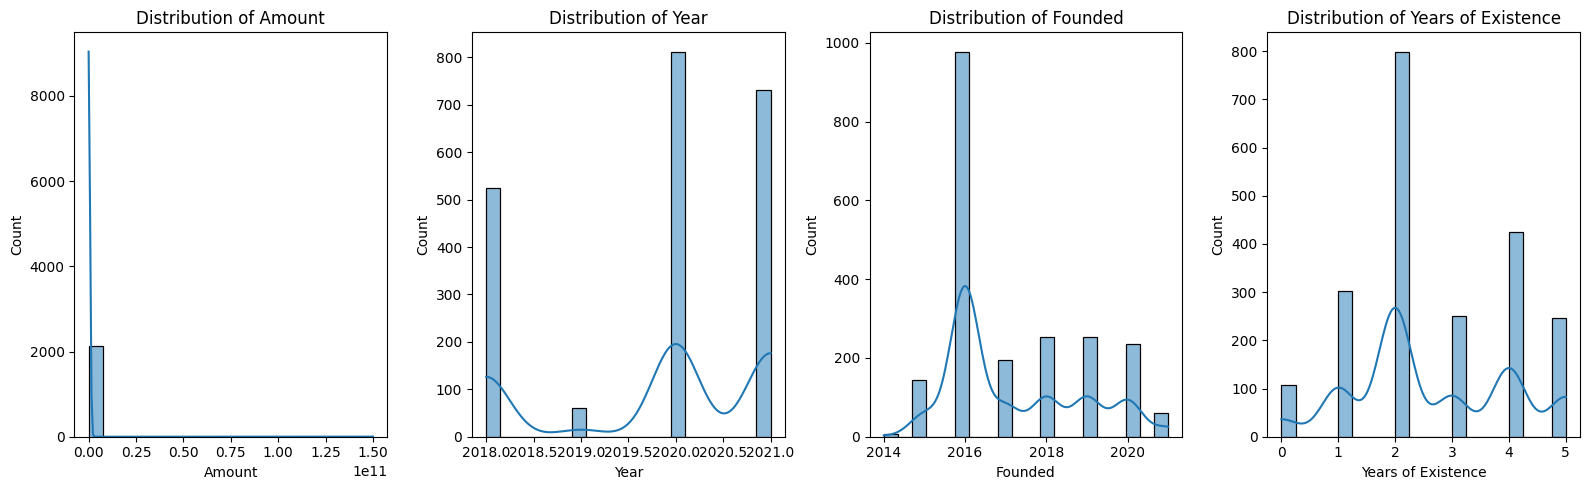

In [266]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))

# Distribution of 'Amount' column
sns.histplot(data['Amount'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Amount')

# Distribution of 'Year' column
sns.histplot(data['Year'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Year')

# Distribution of 'Founded' column
sns.histplot(data['Founded'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Founded')

# Distribution of 'Years of Existence' column
sns.histplot(data['Years of Existence'], bins=20, kde=True, ax=axes[3])
axes[3].set_title('Distribution of Years of Existence')

plt.tight_layout()
plt.show()


##### Frequency Counts for Categorical Columns:

In [ ]:
# Frequency counts for categorical columns
print("Frequency counts for 'Sector' column:")
data['Sector'].value_counts()

##### further cleaning on Sector

In [ ]:
data['Sector'] = data['Sector'].str.title()

In [ ]:
data.groupby('Sector', as_index=False).count()

In [ ]:
data['Sector'].value_counts()

In [ ]:
# Remove leading and trailing spaces in the "Sector" column
data['Sector'] = data['Sector'].str.strip()

# Identify rows where "Sector" contains both "Finance" and "Fintech", and update those rows to "Fintech"
data.loc[data['Sector'].str.contains('Finance') & data['Sector'].str.contains('Fintech'), 'Sector'] = 'Fintech'

data['Sector'].value_counts()

In [ ]:
# Remove leading and trailing spaces in the "Sector" column
data['Sector'] = data['Sector'].str.strip()

# Identify rows where "Sector" contains both "Finance" and "Fintech", and update those rows to "Fintech"
data.loc[data['Sector'].str.contains('Payments') & data['Sector'].str.contains('Retail'), 'Sector'] = 'E-Commerce'

data['Sector'].value_counts()

In [ ]:
data['Sector'].unique()

In [ ]:
# Remove leading and trailing spaces in the "Sector" column
data['Sector'] = data['Sector'].str.strip()

# Identify rows where "Sector" contains both "Finance" and "Fintech", and update those rows to "Fintech"
data.loc[data['Sector'].str.contains('Agriculture') & data['Sector'].str.contains('Farming'), 'Sector'] = 'Agriculture'

data['Sector'].value_counts()

In [ ]:
# Remove leading and trailing spaces in the "Sector" column
data['Sector'] = data['Sector'].str.strip()

# Identify rows where "Sector" contains both "Finance" and "Fintech", and update those rows to "Fintech"
data.loc[data['Sector'].str.contains('Financ') & data['Sector'].str.contains('Lendin'), 'Sector'] = 'Financial Services'

data['Sector'].value_counts()

In [ ]:
# Remove leading and trailing spaces in the "Sector" column
data['Sector'] = data['Sector'].str.strip()

# Identify rows where "Sector" contains both "Finance" and "Fintech", and update those rows to "Fintech"
data.loc[data['Sector'].str.contains('Financial Services') & data['Sector'].str.contains('Fintech'), 'Sector'] = 'Fintech'

data['Sector'].value_counts()

In [ ]:
# Identify rows where "Sector" contains both "Finance" and "Fintech", and update those rows to "Fintech"
data.loc[data['Sector'].str.contains('E-Commerce') & data['Sector'].str.contains('Retail'), 'Sector'] = 'E-Commerce'

data['Sector'].value_counts()

In [ ]:
# Replace various values with 'Agritech' in the "Sector" column
data['Sector'] = data['Sector'].replace([
    'Agri Tech',
    'Agriculture, Agtech, Artificial Intelligence, Internet Of Things, Machine Learning',
    'Agriculture, Agtech, Manufacturing',
    'Agriculture, Mobile',
    'Agritech',
    'Agritech Startup',
    'Agritech/Commerce',
    'Agtech, B2B, Supply Chain Management'
], 'Agritech')

In [ ]:
# Replace specified values with 'AI' in the "Sector" column
data['Sector'] = data['Sector'].replace([
    'Ai',
    'Ai & Data Science',
    'Ai & Debt',
    'Ai & Deep Learning',
    'Ai & Media',
    'Ai & Tech',
    'Ai Chatbot',
    'Ai Company',
    'Ai Health'
], 'AI')

In [ ]:
sorted(map(str, data['Sector'].unique()))[:40]

In [ ]:
# Replace specified values with 'AI' in the "Sector" column
data['Sector'] = data['Sector'].replace(['Ai Platform', 'Ai Robotics', 'Ai Startup'], 'AI')


In [ ]:
data['Sector'].value_counts()

In [ ]:
data.loc[data['Sector'].str.contains('Fintech', case=False, na=False), 'Sector'] = 'Fintech'


In [ ]:
# Replace specified values with 'Ad-Tech' in the "Sector" column
data['Sector'] = data['Sector'].replace([
    'Advertising, Artificial Intelligence, Digital Media, Ios, Location Based Services, News, Video, Video On Demand, Video Streaming',
    'Advertising, Consulting, Digital Marketing',
    'Advertising, Internet, Marketing'
], 'Ad-Tech')

# Print the counts of each unique value in the "Sector" column to verify the changes
data['Sector'].value_counts()


In [ ]:
# Replace specified values with 'Analytics' in the "Sector" column
data['Sector'] = data['Sector'].replace([
    'Analytics',
    'Analytics, Apps, Market Research',
    'Analytics, Audio, Digital Media, Innovation Management, Internet Radio, Media And Entertainment',
    'Analytics, Computer Vision, Enterprise Software, Machine Learning, Natural Language Processing, Speech Recognition',
    'Analytics, Crm, Loyalty Programs, Machine Learning, Marketing Automation, Retail Technology, Saas, Small And Medium Businesses',
    'Android, Big Data, Blockchain, Cloud Computing, Edtech, Education, Information Technology, Ios, Training, Web Development'
], 'Analytics')

In [ ]:
# Replace specified values with 'Apps' in the "Sector" column
data['Sector'] = data['Sector'].replace([
    'Apps',
    'Apps, Audio',
    'Apps, B2B, Freight Service, Logistics, Saas, Shipping, Supply Chain Management, Transportation',
    'Apps, Beauty, Consumer, Retail',
    'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
    'Apps, E-Commerce, Internet'
], 'Apps')

In [ ]:
data.loc[data['Sector'].str.contains('Apps', case=False, na=False), 'Sector'] = 'Apps'


In [ ]:
data.loc[data['Sector'].str.contains('E-Commerce', case=False, na=False), 'Sector'] = 'E-Commerce'


In [ ]:
data.loc[data['Sector'].str.contains('Accounting', case=False, na=False), 'Sector'] = 'Financial Services'


In [ ]:
data.loc[data['Sector'].str.contains('Advertising, Human Resources, Marketing', case=False, na=False), 'Sector'] = 'Advertisement'


In [ ]:
# Replace specified values with 'Ar/Vr' in the "Sector" column
data['Sector'] = data['Sector'].replace(['Ar Platform', 'Ar Startup', 'Ar/Vr', 'Ar/Vr Startup'], 'Ar/Vr')


In [ ]:
# Replace specified values with 'Automation' in the "Sector" column
data['Sector'] = data['Sector'].replace(['Automation', 'Automation Tech'], 'Automation')


In [ ]:
# Replace specified values with 'Automobile' in the "Sector" column
data['Sector'] = data['Sector'].replace(['Automobile', 'Automobile & Technology', 'Automobile Technology', 'Automobiles', 'Automotive'], 'Automobile')


In [ ]:
# Replace specified values with 'Aerospace' in the "Sector" column
data['Sector'] = data['Sector'].replace(['Aeorspace', 'Aero Company', 'Aerospace'], 'Aerospace')


In [ ]:
# Replace specified values with 'Automobile' in the "Sector" column
data['Sector'] = data['Sector'].replace([
    'Automotive And Rentals',
    'Automotive Company',
    'Automotive Startup',
    'Automotive Tech',
    'Automotive, Battery, Electric Vehicle, Manufacturing, Mechanical Design',
    'Automotive, Battery, Energy, Energy Storage',
    'Automotive, Electric Vehicle, Energy',
    'Automotive, Electric Vehicle, Energy Storage',
    'Automotive, Electric Vehicle, Renewable Energy',
    'Automotive, Marketplace, Online Portals',
    'Automotive, Rental, Sharing Economy',
    'Automotive, Retail',
    'Automotive, Search Engine, Service Industry',
    'Autonomous Vehicles'
], 'Automobile')

In [ ]:
# Replace specified values with 'Aviation' in the "Sector" column
data['Sector'] = data['Sector'].replace(['Aviation', 'Aviation & Aerospace'], 'Aviation')


In [ ]:
# Replace values containing 'B2B' with 'B2B' in the "Sector" column
data.loc[data['Sector'].str.contains('B2B', case=False, na=False), 'Sector'] = 'B2B'

In [ ]:
# Replace specified values with 'Financial Services' in the "Sector" column
data['Sector'] = data['Sector'].replace([
    'Banking',
    'Banking, E-Learning, Trading Platform',
    'Banking, Finance, Financial Services',
    'Banking, Finance, Financial Services, Non Profit'
], 'Financial Services')

In [ ]:
# Replace specified values with 'AI' in the "Sector" column
data['Sector'] = data['Sector'].replace([
    'Artificial Intelligence',
    'Artificial Intelligence, Business Intelligence, Industrial Automation, Machine Learning',
    'Artificial Intelligence, Cloud Computing, Video',
    'Artificial Intelligence, Computer, Machine Learning',
    'Artificial Intelligence, Drones, Navigation, Packaging Services, Robotics',
    'Artificial Intelligence, Energy, Oil And Gas',
    'Artificial Intelligence, Human Resources, Information Services, Information Technology',
    'Artificial Intelligence, Information Technology',
    'Artificial Intelligence, Machine Learning, Paas',
    'Artificial Intelligence, Machine Learning, Saas, Virtual Assistant',
    'Artificial Intelligence, Product Search, Saas, Service Industry, Software',
    'Artificial Intelligence, Social'
], 'AI')

In [ ]:
# Replace values containing 'Edtech' or 'Ed-tech' with 'Ed-tech' in the "Sector" column
data.loc[data['Sector'].str.contains('Edtech|Ed-tech', case=False, na=False), 'Sector'] = 'Ed-tech'


In [ ]:
# Replace values containing 'Food', 'Beverages', or 'Nutrition' with 'Food & Beverages' in the "Sector" column
data.loc[data['Sector'].str.contains('Food|Beverages|Nutrition', case=False, na=False), 'Sector'] = 'Food & Beverages'

# Print the counts of each unique value in the "Sector" column to verify the changes
print(data['Sector'].value_counts())


In [ ]:
# Replace values containing 'Yoga', 'Health', 'Fitness', or 'Wellness' with 'Health & Wellness' in the "Sector" column
data.loc[data['Sector'].str.contains('Yoga|Health|Fitness|Wellness', case=False, na=False), 'Sector'] = 'Health & Wellness'

# Replace values containing 'Health-Tech' in the "Sector" column if they also contain specified technology-related terms
data.loc[data['Sector'].str.contains('Yoga|Health|Fitness|Wellness', case=False, na=False) & 
         data['Sector'].str.contains('Technology|Information Technology|Internet|IoT|Healthtech', case=False, na=False), 'Sector'] = 'Health-Tech'

# Print the counts of each unique value in the "Sector" column to verify the changes
print(data['Sector'].value_counts())


In [ ]:
# Replace values containing 'Social Media' with 'Digital Marketing' in the "Sector" column
data.loc[data['Sector'].str.contains('Social Media', case=False, na=False), 'Sector'] = 'Digital Marketing'

# Print the counts of each unique value in the "Sector" column to verify the changes
print(data['Sector'].value_counts())


In [ ]:
# Replace values containing 'Energy' or 'Natural Resources' with 'Energy' in the "Sector" column
data.loc[data['Sector'].str.contains('Energy|Natural Resources', case=False, na=False), 'Sector'] = 'Energy'

# Print the counts of each unique value in the "Sector" column to verify the changes
print(data['Sector'].value_counts())


In [ ]:
# Replace values containing 'Fashion' or 'Lifestyle' with 'Fashion & Lifestyle' in the "Sector" column
data.loc[data['Sector'].str.contains('Fashion|Lifestyle', case=False, na=False), 'Sector'] = 'Fashion & Lifestyle'

# Print the counts of each unique value in the "Sector" column to verify the changes
print(data['Sector'].value_counts())


In [ ]:
# Replace values containing 'Sports' with 'Sports' in the "Sector" column
data.loc[data['Sector'].str.contains('Sports', case=False, na=False), 'Sector'] = 'Sports'

# Print the counts of each unique value in the "Sector" column to verify the changes
print(data['Sector'].value_counts())


In [ ]:
# Replace values containing 'Telecommuncation' with 'Telecommunication' in the "Sector" column
data.loc[data['Sector'].str.contains('Telecommuncation', case=False, na=False), 'Sector'] = 'Telecommunication'

# Print the counts of each unique value in the "Sector" column to verify the changes
print(data['Sector'].value_counts())



In [ ]:
# Replace values containing 'Tourism' or 'Hospitality' with 'Tourism & Hospitality' in the "Sector" column
data.loc[data['Sector'].str.contains('Tourism|Hospitality', case=False, na=False), 'Sector'] = 'Tourism & Hospitality'

# Print the counts of each unique value in the "Sector" column to verify the changes
print(data['Sector'].value_counts())


In [ ]:
# Replace values containing 'Transport' or 'Travel' with 'Transportation' in the "Sector" column
data.loc[data['Sector'].str.contains('Transport|Travel', case=False, na=False), 'Sector'] = 'Transportation'

# Print the counts of each unique value in the "Sector" column to verify the changes
print(data['Sector'].value_counts())


In [ ]:
# Define a dictionary to map each sector to its suggested category
sector_categories = {
    'Online Storytelling': 'Technology',
    'Ott': 'Technology',
    'Paas Startup': 'Technology',
    'Packaging Services': 'Others',
    'Packaging Solution Startup': 'Others',
    'Personal Care': 'Health & Wellness',
    'Personal Care Startup': 'Health & Wellness',
    'Pet Care': 'Health & Wellness',
    'Pharma': 'Health & Wellness',
    'Pharmaceutical': 'Health & Wellness',
    'Pharmacy': 'Health & Wellness',
    'Photonics Startup': 'Technology',
    'Pollution Control Equiptment': 'Others',
    'Preschool Daycare': 'Education & Learning',
    'Product Studio': 'Others',
    'Professional Training & Coaching': 'Education & Learning',
    'Proptech': 'Technology',
    'Publication': 'Others',
    'Qsr Startup': 'Technology',
    'Real Estate': 'Real Estate',
    'Wine & Spirits': 'Food & Beverages',
    'Wl & Rac Protection': 'Others',
    'Work Fulfillment': 'Technology'
}

# Map each sector to its suggested category
data['Sector'] = data['Sector'].map(sector_categories)

# Print the counts of each unique value in the "Sector" column to verify the changes
print(data['Sector'].value_counts())


In [ ]:
sorted(map(str, data['Sector'].unique()))[1:579]

In [ ]:
data['Sector'].unique()

### Bivariate ANalysis

#### Correlation Analysis

##### the correlation matrix between numeric variables to identify linear relationships.

##### the correlation matrix using a heatmap for better interpretation

#### Scatter Plots

In [ ]:
# Scatter Plots
# Create scatter plots for pairs of numeric variables
sns.pairplot(data_df[['Amount', 'Year', 'Founded']])
plt.show()

In [ ]:
all_data= data

In [ ]:
all_data